**NOTE2SELF (Dec 4, 2019)**: My interpretation of "Demographics" and "Demographic Kept" was in reverse ... "DK" was the old one...  Updates throughout notebook.

In [47]:
# This cell is simply for aesthetics
from IPython.core.display import HTML
def activate_html():
    html = HTML("""
    <style>
        #title {
          text-align: center;
          font-weight:bold
        }
        #cell {
            text-align:left
        }
        #redcell {
            text-align:left;
            color:red;
        }
        .update {
            background-color:sandybrown;
        }
        .mon {
            background-color:skyblue;
        }
        .toi {
            background-color:#ffd27f;
        }
    </style>
    """)
    return html
    

activate_html()

In [639]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [1]:
!ls ../data/raw

BISH FETAL GA ASSESSMENT_DB.csv
Derived Variables of Interest Participants Only.mental_ill_DB.csv
adafppappa_DB.csv
adalc_patid_DB.csv
adcdrisc_DB.csv
addrg_patid_DB.csv
adedin_merged_edit_bish_DB.csv
adelig_DB.csv
adfetalgrowth_BISHCORRECTED_01.24.19_persex_DB.csv
admh_DB.csv
adptsd_DB.csv
adsc_DB.csv
adscmat_DB.csv
adsmk_patid_DB.csv
adstai_DB.csv
advs_DB.csv


<font color='red' size=10>
    <b>BISH FETAL GA ASSESSMENT_DB.csv</b>
</font>

| Info | Value |
|------|-------|
| N Cols | 7      |
| N Rows | 12,383 |
| Unique PATID | 6,558 |

This is basically the same BISH file that I went over from Udi's MBH001 project in the
previous notebook, `01__KU__Inspection-of-Udis-Final-Analysis.v2.ipynb`.

Point is, these records have to do with when sensor recordings were measured.  Since
patients had multiple recordings, they have multiple records in the table. 

**Objective**:  What we have to do with the BISH data is essentially decide how
we want to widen it.  In the previous notebook, I found that referring to the tests
as "F1 tests" or "F3 tests" (etc) is only loosely followed in terms of GA...  That is,
given the definitions of Fx, the tests do not always fall inside any of the definitions.  What
is apparent though, is that most patients have two tests... So we can just refer to these
tests as test1 and test2....



In [5]:
bish = pd.read_csv('../data/raw/BISH FETAL GA ASSESSMENT_DB.csv')

In [8]:
bish.shape

(12383, 7)

In [17]:
bish.columns

Index(['PATID', 'Box Number', 'Original File Name', 'Final File Name',
       'Final File Name.1', 'GA_In_Days', 'Number Of Fetuses'],
      dtype='object')

In [11]:
len(bish.PATID.unique())

6558

In [746]:
bish.describe()[3:]

,GA_In_Days,Number Of Fetuses
min,116.0,1.0
25%,161.0,1.0
50%,221.0,1.0
75%,242.0,1.0
max,339.0,2.0


In [747]:
# How many records are associated w/ 2 fetuses
bish['Number Of Fetuses'].map(lambda x: 1 if x > 1 else 0).sum()

4

In [748]:
bish.head(3)

,PATID,Box Number,Original File Name,Final File Name,Final File Name.1,GA_In_Days,Number Of Fetuses
0,S002-BISH-00001,2007-04,S002-BISH-00001-2007-04.physio,S002-BISH-00001-T010-10.physio,S002-BISH-00001-T010-10,150,1
1,S002-BISH-00001,2007-04,11-22-s002-bish-00001-2007-04.physio,S002-BISH-00001-T010-15.physio,S002-BISH-00001-T010-15,202,1
2,S002-BISH-00002,2007-04,S002-BISH-00002-2007-04.physio,S002-BISH-00002-T010-10.physio,S002-BISH-00002-T010-10,167,1


In [749]:
bish.tail(3)

,PATID,Box Number,Original File Name,Final File Name,Final File Name.1,GA_In_Days,Number Of Fetuses
12380,S002-BISH-07061,2007-05,03-16-S002-BISH-07061-2007-05.physio,S002-BISH-07061-T010-10.physio,S002-BISH-07061-T010-10,155,1
12381,S002-BISH-07061,2007-09,06-08-S002-BISH-07061-2007-09.physio,S002-BISH-07061-T010-20.physio,S002-BISH-07061-T010-20,239,1
12382,S002-BISH-07062,2007-06,02-23-S002-BISH-07062-2007-06.physio,S002-BISH-07062-T010-20.physio,S002-BISH-07062-T010-20,244,1


In [767]:
bish.groupby('PATID')['GA_In_Days'].agg([min,lambda x: round(np.median(x)),max]).\
    rename(columns={'min':'min_ga','<lambda>':'middle_ga','max':'max_ga'}).\
    head()

,min_ga,middle_ga,max_ga
PATID,,,
S002-BISH-00001,150,176,202
S002-BISH-00002,167,204,242
S002-BISH-00003,201,224,246
S002-BISH-00004,251,251,251
S002-BISH-00005,255,255,255


-----------------------

<font color='red' size=6>
    MENTAL:<br>
    <b>Derived Variables of Interest Participants Only.mental_ill_DB.csv</b>
</font>

---------------

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani green lights to further investigate the following vars:
* aantipsych2
* antianx2
* anticonv2
* antidepress2
* moodstab2
* ssri2
* stim2

However, in tab2 ("Demographic Variables Kept"), she green lights one more:
* cantipsych2

She also includes 4 other vars in tab2, which are not green lighted, but are commented
(<i>"include? check w other edinburgh and compare"</i>):
* edinburgh1mo
* edinburgh1mo_13FL2
* fedinburgh
* fedinburgh_13FL2

--------------

<font size=4 style="background-color:sandybrown;">
<b>UPDATE \#1 (Dec 4, mtg w/ Dani)</b>:  The reason these "edinburgh" vars are not entirely necessary is b/c there
is another file (below) that contains edinburgh info.  Dani says she has since decided that
these edinburgh variables are redundant at best, or -- at worst -- redundant, less informative,
and burdensome (a la the curse of dimensionality).  So, <b><font color='red'>leave out the edinburgh vars from this
    table</font></b>.  That is all.
    
<b>UPDATE \#2 (Dec 4, mtg w/ Dani)</b>:  My interpretation of Dani's Excel file was incorrect while 
creating this JNB on Dec 2.  The
second tab, called "Demographic Variables Kept", was actually her first attempt at flagging variables
of interest (I interpreted "Kept" to mean this tab indicated her final decisions on things).  The first tab "Demographic Variables" was her follow-up attempt (this was supposed to be her "final" ruling).  So, for example, 
she had already ruled <font style="color:red;font-family:'Courier New';font-weight:bold;">cantipsych</font> and the 
<font style="color:red;font-family:'Courier New';font-weight:bold;">edinburgh</font> variables out prior to this meeting.  However,
what we found when going through this JNB during our meeting is that she was not 100% consistent 
in which tab she used to document the variables of interest...so she will be making a new Excel
file, V3.  I will reference that file in the companion JNB, <b>02b__KU__2019-Dec-04__...</b>
</font>

-----------------

<br>
<font style="background-color:yellow;">
    <b>IMPORTANT</b>: Though Dani was mostly successful in removing NaNs/Nulls, it seems some have made it 
through, e.g., see 
</font>

* `mental_keepers.isnull().sum()`, which reveals that moodstab2 has a NULL
* `mental_keepers.query('moodstab2 not in [1,0,-999999]')`, which provides the index of the NULL (6490)


<br>
<font style="background-color:yellow;">
    <b>IMPORTANT</b>: All of these variables have almost NO variability.  Of 6490 records,
    the most varied variable, <i>antidepress2</i>, has only 23 nonzero-nonnull records; the
    next best var only 12; the remainings vars even worse!
</font>    
    
| Highly Imbalanced Feature | Percent Nonzero/Nonnull | Number of records (Total: 6490) |
|---|---|----|
| ssri2          |0.14% |  10 |
| antidepress2   |0.33% |  23 |
| cantipsych2    |0.03% |  2 |
| aantipsych2    |0.06% |  4 |
| moodstab2      |0.1%  |  7 |
| stim2          |0.01% |  1 |
| antianx2       |0.01% |  1 |
| anticonv2      |0.17% | 12 |



<ol style="background-color:yellow;">
    <li>The var w/ only 1-2 records (stim2, antianx2, cantipsych2) should be
        discarded (cannot split it into trn/val/tst).</li>
    <li>If we care about the remaining vars, then we need to ensure they are split balanced into
        trn/val/tst sets...but not only balanced in number, but in distribution (e.g., it is useless
        if we have 4 otherlmp2 values all 0 in training, but have 3 remaining values of 1 split into
        val and tst sets.  <b>This might take some finesse and time, which we might not have.</b></li>
</ol>


<font size=4 style="background-color:sandybrown;">
    <b>UPDATE (Dec 4, mtg w/ Dani)</b>:  Dani agrees that these variables are mostly
    useless due to having nearly no nonZero/nonNull values.  We discussed possibly creating
    an overall "psych" var that is simply flagged if any of these vars are flagged.  I may
    or may not do this... I wonder if it'd be better if she make it for the raw file itself. Either
    way, we definitely should remove <b><font color='red'>antianx2, stim2, cantipsych2, aantispych2,
    and moodstab2</font></b>
</font>


### FINAL Code...
NOTE: Still have to play w/ 4 other vars she is interested in...

---------------------------
```python
mental_cols = ['patid','aantipsych2','antianx2','anticonv2','antidepress2','cantipsych2',
           'moodstab2','ssri2','stim2',]
mental = pd.read_csv('../data/raw/Derived Variables of Interest Participants Only.mental_ill_DB.csv',
    usecols = mental_cols)
mental.fillna(-999999, inplace=True)
```
------------------------------

In [15]:
mental = pd.read_csv('../data/raw/Derived Variables of Interest Participants Only.mental_ill_DB.csv')

In [16]:
mental.shape

(6923, 25)

In [18]:
mental.columns

Index(['patid', 'center', 'site', 'Hispanic2', 'RACEAI7', 'RACEAI4',
       'AnxietyPrior2', 'DepressionPrior2', 'EpilepsyPrior2', 'fedinburgh',
       'edinburgh1mo', 'edinburgh1mo_13FL2', 'fedinburgh_13FL2', 'state_anx',
       'trait_anx', 'state_anx_40FL2', 'trait_anx_40FL2', 'ssri2',
       'antidepress2', 'cantipsych2', 'aantipsych2', 'moodstab2', 'stim2',
       'antianx2', 'anticonv2'],
      dtype='object')

In [20]:
len(mental.patid.unique())

6923

In [76]:
mental_keepers = mental[['aantipsych2','antianx2','anticonv2','antidepress2','moodstab2','ssri2','stim2',]]
mental_keepers.head()

,aantipsych2,antianx2,anticonv2,antidepress2,moodstab2,ssri2,stim2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
mental_keepers.describe().iloc[3:]

,aantipsych2,antianx2,anticonv2,antidepress2,moodstab2,ssri2,stim2
min,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [78]:
mental_keepers.isnull().sum()

aantipsych2     0
antianx2        0
anticonv2       0
antidepress2    0
moodstab2       1
ssri2           0
stim2           0
dtype: int64

In [79]:
null_index = mental_keepers.isnull()

In [93]:
mental_keepers.query('moodstab2 not in [1,0,-999999]')

,aantipsych2,antianx2,anticonv2,antidepress2,moodstab2,ssri2,stim2
6490,0.0,0.0,0.0,0.0,NaN,0.0,0.0


Just in case, let's look at the rest of the columns in the same manner.

In [95]:
print('aantipsych2:',len(mental_keepers.query('aantipsych2 not in [1,0,-999999]')))
print('antianx2:',len(mental_keepers.query('antianx2 not in [1,0,-999999]')))
print('anticonv2:',len(mental_keepers.query('anticonv2 not in [1,0,-999999]')))
print('antidepress2:',len(mental_keepers.query('antidepress2 not in [1,0,-999999]')))
print('ssri2:',len(mental_keepers.query('ssri2 not in [1,0,-999999]')))
print('stim2:',len(mental_keepers.query('stim2 not in [1,0,-999999]')))

aantipsych2: 0
antianx2: 0
anticonv2: 0
antidepress2: 0
ssri2: 0
stim2: 0


Here is how to fix the NaN.

In [99]:
mental_keepers.query('moodstab2 not in [1,0,-999999]').fillna(-999999)

,aantipsych2,antianx2,anticonv2,antidepress2,moodstab2,ssri2,stim2
6490,0.0,0.0,0.0,0.0,-999999.0,0.0,0.0


<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [820]:
print('N Records:', mental.shape[0])
print('N Unique PATIDs:', mental.patid.unique().shape[0])

N Records: 6923
N Unique PATIDs: 6923


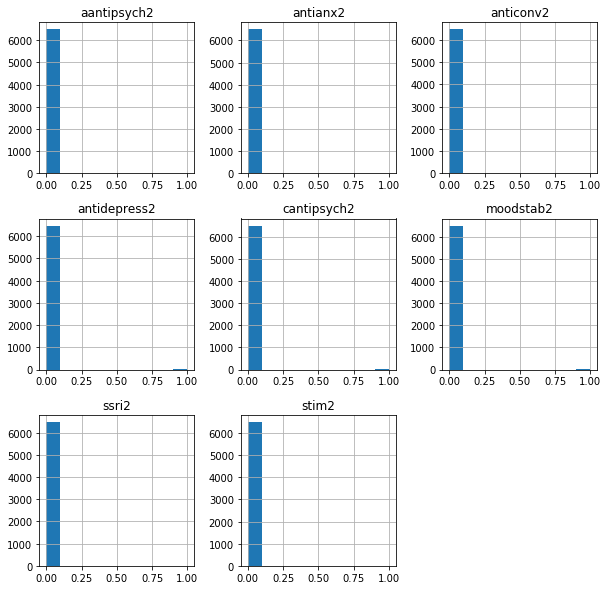

In [711]:
# Final
mental_cols = ['patid','aantipsych2','antianx2','anticonv2','antidepress2','cantipsych2',
           'moodstab2','ssri2','stim2',]
mental = pd.read_csv('../data/raw/Derived Variables of Interest Participants Only.mental_ill_DB.csv',
    usecols = mental_cols)
mental.fillna(-999999, inplace=True)
# Viz
mental.replace(-999999,np.nan).dropna().hist(figsize=(10,10));

In [723]:
print('Mental Record Count:',len(mental))
mental.replace(-999999,0).sum()

Mental Record Count: 6923


patid           S002-BISH-00001S002-BISH-00002S002-BISH-00003S...
ssri2                                                          10
antidepress2                                                   23
cantipsych2                                                     2
aantipsych2                                                     4
moodstab2                                                       7
stim2                                                           1
antianx2                                                        1
anticonv2                                                      12
dtype: object

In [721]:
mental.replace(-999999,0).sum()[1:].map(lambda x: round(100*x/len(mental), 2)).map(lambda x: str(x)+'%')

ssri2           0.14%
antidepress2    0.33%
cantipsych2     0.03%
aantipsych2     0.06%
moodstab2        0.1%
stim2           0.01%
antianx2        0.01%
anticonv2       0.17%
dtype: object

----------------------------------

<font color='red' size=10>
    <b>adafppappa_DB.csv</b>
</font>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani green lights to keep the following vars:
* AFPMoM

However, in tab 2 ("Demographic Variables Kept"), Dani green lights an additional var with
a comment (<i>"check that the GAs are not too late!"</i>:
* AFPGA - GA at AFP Collection

In other words, to avoid data leakage, we only want to keep AFPGA if it is measured before the 
3rd trimester.  Alternatively, we can assume that this measurement would be roughly the
same in the 2nd trimester and keep it (for example, the mother's age is a variable where this
assumption would hold just fine).  The maximum GA for this table is ~32.5 weeks, which is
like halfway into the 3rd trimester... **TODO**: Find out what this variable means, then
decide how to proceed.


<font style="background-color:sandybrown;">
    <b>UPDATE (Dec 4, mtg w/ Dani)</b>: I showed Dani that the maximum GA of this 
    measurement was 32.5 weeks (min ~18.6 wks).  I argued that this is early enough
    to ensure that a prediction can be made at a reasonable time (e.g., at 32-33 weeks) 
    and that, if we assume this measurement is fairly stable, then we can assume the later
    ones would have measured similarly earlier on... She agreed, explaining what this table
    measures: AFP (alpha-fetoprotein) and PAPPA (pregnancy associate plasma protein-A).  In
    other words, this is a birth defects test (measures things like downs syndrome, placental
    issues, and more).  <b>ACTION</b>: we can drop <font style="font-family:'Courier New';font-weight:bold;color:red;">AFPGA</font> if we'd like to.
</font>


### FINAL Code...
-----------------------------------
```python
adafppappa = pd.read_csv('../data/raw/adafppappa_DB.csv', usecols = ['PATID','AFPMoM'])
adafppappa.columns = map(str.lower, adafppappa.columns)
# Correct the Missing Value representation (-9999.99 --> -999999)
adafppappa.afpmom = adafppappa.afpmom.map(lambda x: -999999 if x == -9999.99 else x)
```
----------------------------------

In [958]:
adafppappa = pd.read_csv('../data/raw/adafppappa_DB.csv')

In [32]:
adafppappa.shape

(1425, 14)

In [33]:
adafppappa.columns  # Unnamed 

Index(['PATID', 'Site', 'afpunit', 'AFPGA', 'AFPMoM', 'pappaunit', 'PAPPAGA',
       'PAPPAMoM', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [34]:
len(adafppappa.PATID.unique())

1425

In [35]:
adafppappa.head()

,PATID,Site,afpunit,AFPGA,AFPMoM,pappaunit,PAPPAGA,PAPPAMoM,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,S002-BISH-00843,BISH,NaN,-9999.99,-9999.99,IU/L,56.0,-999999.0,NaN,NaN,NaN,NaN,NaN,NaN
1,S002-BISH-00102,BISH,NaN,-9999.99,-9999.99,IU/L,61.0,-999999.0,NaN,NaN,NaN,NaN,NaN,NaN
2,S002-BISH-00099,BISH,NaN,-9999.99,-9999.99,IU/L,62.0,-999999.0,NaN,NaN,NaN,NaN,NaN,NaN
3,S002-BISH-00326,BISH,NaN,-9999.99,-9999.99,IU/L,65.0,-999999.0,NaN,NaN,NaN,NaN,NaN,NaN
4,S002-BISH-01702,BISH,NaN,-9999.99,-9999.99,IU/L,65.0,-999999.0,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
adafppappa.filter(regex='^[^U]').head()

,PATID,Site,afpunit,AFPGA,AFPMoM,pappaunit,PAPPAGA,PAPPAMoM
0,S002-BISH-00843,BISH,NaN,-9999.99,-9999.99,IU/L,56.0,-999999.0
1,S002-BISH-00102,BISH,NaN,-9999.99,-9999.99,IU/L,61.0,-999999.0
2,S002-BISH-00099,BISH,NaN,-9999.99,-9999.99,IU/L,62.0,-999999.0
3,S002-BISH-00326,BISH,NaN,-9999.99,-9999.99,IU/L,65.0,-999999.0
4,S002-BISH-01702,BISH,NaN,-9999.99,-9999.99,IU/L,65.0,-999999.0


In [51]:
adafppappa.filter(regex='^[^U]').describe()[3:]

,AFPGA,AFPMoM,PAPPAGA,PAPPAMoM
min,-9999.99,-9999.99,-999999.0,-999999.0
25%,151.00,0.67,-999999.0,-999999.0
50%,159.00,0.88,-999999.0,-999999.0
75%,163.00,1.13,-999999.0,-999999.0
max,227.00,7.73,617.0,-999999.0


In [102]:
adafppappa_keepers = adafppappa[['AFPMoM']]

In [104]:
adafppappa_keepers.isnull().sum()

AFPMoM    0
dtype: int64

In [324]:
adafppappa.AFPGA.max() # Days

227.0

In [973]:
print('MAX GA [Wks]:',round(adafppappa.AFPGA.max()/7, 1)) # Weeks

MAX GA [Wks]: 32.4


In [959]:
round(adafppappa.AFPGA.min()/7, 1) # Weeks  (Duh, this is -9999.99/7)

-1428.6

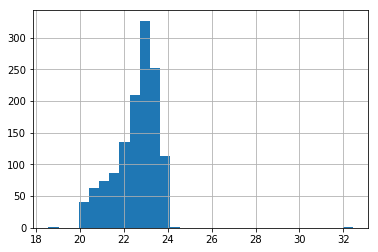

In [968]:
adafppappa['AFPGA'].replace(-9999.99,np.nan).dropna().map(lambda x: x/7).hist(bins=30)

In [972]:
print('MIN GA [Wks]:',round(adafppappa['AFPGA'].replace(-9999.99,np.nan).min()/7, 1)) # Weeks 

MIN GA [Wks]: 18.6


In [708]:
# Missing value SHOULD BE -999999 (not -9999.99)
adafppappa.afpmom.map(lambda x: -999999 if x == -9999.99 else x)[:10]

0   -999999.00
1   -999999.00
2   -999999.00
3   -999999.00
4   -999999.00
5         0.88
6   -999999.00
7   -999999.00
8         0.88
9   -999999.00
Name: afpmom, dtype: float64

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [821]:
print('N Records:', adafppappa.shape[0])
print('N Unique PATIDs:', adafppappa.patid.unique().shape[0])

N Records: 1425
N Unique PATIDs: 1425


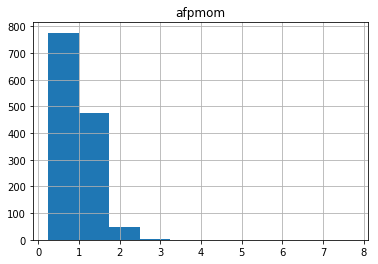

In [706]:
adafppappa = pd.read_csv('../data/raw/adafppappa_DB.csv', usecols = ['PATID','AFPMoM'])
adafppappa.columns = map(str.lower, adafppappa.columns)
adafppappa.afpmom = adafppappa.afpmom.map(lambda x: -999999 if x == -9999.99 else x)
# Viz
adafppappa.replace(-999999,np.nan).dropna().hist();

-------------------------

<font color='red' size=20>
    <b>adalc_patid_DB.csv</b>
</font>

<br>

<font style="background-color:sandybrown;">
    <b>UPDATE 1 (Dec 4, mtg w/ Dani)</b>: The "adalc_patid_DB.csv" table that this section is based
    off of no longer exists.  While going over this section, Dani realized that she copied-and-pasted
    the wrong tab of data, which helps explain some of file's oddness (e.g., the analysis section left in
    the CSV file).  During the meeting, Dani corrected the file.  To avoid having a bad data file laying
    around, we just deleted the old file and replaced it with the new one.  (In other words, the analysis
    below can no longer be replicated, so leave those cells alone!)
</font><br><br>
<font style="background-color:sandybrown;">
    <b>UPDATE 2</b>: Given that I misinterpreted the Excel tabs, the variables I put in bold are
    NOT the only variables of interest: the whole list is!  That is, the V2 Excel file, the 
    "Demographics Variables Kept" tab was Dani's first attempt at identifying interesting variables
    (but which I interpreted as her final ruling in this JNB), while the first tab ("Demographic Variables")
    was supposed to be her final ruling.  However, we found some inconsistencies in keeping true to
    this distinction, so she is making up better, cleaned up version of the Excel file (v3), while I'll
    be putting together a companion JNB to this one (02b__KU__2019-Dec-04__...).
</font><br><br>
<font style="background-color:sandybrown;">
    <b>ACTION</b>: tweak the code to respect the lessons learned (keep the larger list of vars, use
    the corrected data file, etc).
</font>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx`  tab 1 ("Demographic Variables"), Dani greenlights the following vars for further
inspection:

* **patid**
* **Binge7T12**
* **Binge7T22**
* **BingeCountT1** - Total Binge Episodes in Trimester 1 (GA: 0 to 97)
* **BingeCountT2** - Total Binge Episodes  in Trimester 2 (GA: 98 to 195)
* **DrankAroundLMP2** - Drank Around LMP (GA: -15 to 15)
* **MaxConsDDaysT1** - Maximum Number of Consecutive Drinking Days in Trimester 1 (GA: 0 to 97)
* **MaxConsDDaysT2** - Maximum Number of Consecutive Drinking Days in Trimester 2 (GA: 98 to 195)
* **OneYrPrior6**
* **TotalStdDrinksLMP**
* **TotalStdDrinksT1**
* **TotalStdDrinksT2**
* HairLMP2
* HairT12
* HairT22
* Meth1YrPrior6
* MethLMP2
* MethT12
* MethT22
* MJLMP2
* MJT12
* MJT22
* Other1YrPrior2
* OtherLMP2
* OtherT12
* OtherT22



This var set is reduced in tab 2 of that file ("Demographic Variables Kept"); the remaining
variables from tab1 are marked in bold above.  

**RESOLVE THIS**: Tab2 includes the two `Bing7T*` vars, but only as commented variables 
(<i>"Using month data is better but month or week have no GA info"</i>) -- not greenlit. Point: Do
we want to use them or not?<font style="background-color:lightgreen;">No worries... There were quite a few hiccups and everything is being revamped; see various UPDATEs in this section.</font>

**NOTE**: this tab also includes an additional 
greenlit var as well (which is not included in the corresponding CSV file):
* **MoreThan1YrPrior2** - Drank More Than 1 Year Prior to Pregnancy
    - Honestly, it doesn't seem like this one is worth fretting over, but (**TODO**) I should
      still bring it up to Dani for resolution.

Only 13 cols are listed in the corresponding CSV file -- the 12 listed in bold above from tab1, plus 
* **Drank1YrPrior2** - Drank in the Year Prior to Pregnancy  
    - this seems to be in place of **MoreThan1YrPrior2**

<font style="background-color:yellow;">
    <b>IMPORTANT</b>: Follow up w/ Dani about `adalc_patid` var she marked for saving, but which does
    not appear in her `adalc_patid` CSV file.
</font><font style="background-color:lightgreen;">No worries... There were quite a few hiccups and
    everything is being revamped; see various UPDATEs in this section.</font>


<br>

**WARNING**: if you use `pd.read_csv` defaults, you will see a lot of weird stuff, like over 1000
"Unnamed" columns, as well as a column with the name "6.00".  If you open up the CSV file, 
you will find this is because the data columns only span columns A - M, housing the variables
OneYrPrior6, Drank1YrPrior2, DrankAroundLMP2, BingeCountT1, BingeCountT2, Binge7T12, Binge7T22,
MaxConsDDaysT1, MaxConsDDaysT2, TotalStdDrinksLMP, TotalStdDrinksT1, and TotalStdDrinksT2.  After
column M, there are several blank columns, then an analysis Dani did (probably forgot to remove
it from the final CSV file).<font style="background-color:lightgreen;">No worries... There were quite a few hiccups and everything is being revamped; see various UPDATEs in this section.</font>

<br>




### Final Code...
---------------------------
```python
adalc = pd.read_csv('../data/raw/adalc_patid_DB.csv', usecols=range(0,12))
adalc.columns = map(str.lower, adalc.columns)
```
--------------------------------

In [106]:
adalc = pd.read_csv('../data/raw/adalc_patid_DB.csv')

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (19,20,21,23,24,44,45,1684,1685) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
adalc.columns

Index(['patid', 'OneYrPrior6', 'Drank1YrPrior2', 'DrankAroundLMP2',
       'BingeCountT1', 'BingeCountT2', 'Binge7T12', 'Binge7T22',
       'MaxConsDDaysT1', 'MaxConsDDaysT2',
       ...
       'Unnamed: 1676', 'Unnamed: 1677', 'Unnamed: 1678', 'Unnamed: 1679',
       'Unnamed: 1680', 'Unnamed: 1681', 'Unnamed: 1682', 'Unnamed: 1683',
       'Unnamed: 1684', 'Unnamed: 1685'],
      dtype='object', length=1686)

In [126]:
[item for item in adalc.columns][:30]

['patid',
 'OneYrPrior6',
 'Drank1YrPrior2',
 'DrankAroundLMP2',
 'BingeCountT1',
 'BingeCountT2',
 'Binge7T12',
 'Binge7T22',
 'MaxConsDDaysT1',
 'MaxConsDDaysT2',
 'TotalStdDrinksLMP',
 'TotalStdDrinksT1',
 'TotalStdDrinksT2',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 '6.00',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29']

In [123]:
adalc.filter(regex='^[^U]').columns

Index(['patid', 'OneYrPrior6', 'Drank1YrPrior2', 'DrankAroundLMP2',
       'BingeCountT1', 'BingeCountT2', 'Binge7T12', 'Binge7T22',
       'MaxConsDDaysT1', 'MaxConsDDaysT2', 'TotalStdDrinksLMP',
       'TotalStdDrinksT1', 'TotalStdDrinksT2', '6.00'],
      dtype='object')

In [137]:
adalc = pd.read_csv('../data/raw/adalc_patid_DB.csv', usecols=range(0,12))

In [138]:
adalc.columns

Index(['patid', 'OneYrPrior6', 'Drank1YrPrior2', 'DrankAroundLMP2',
       'BingeCountT1', 'BingeCountT2', 'Binge7T12', 'Binge7T22',
       'MaxConsDDaysT1', 'MaxConsDDaysT2', 'TotalStdDrinksLMP',
       'TotalStdDrinksT1'],
      dtype='object')

In [139]:
adalc.isnull().sum()

patid                0
OneYrPrior6          0
Drank1YrPrior2       0
DrankAroundLMP2      0
BingeCountT1         0
BingeCountT2         0
Binge7T12            0
Binge7T22            0
MaxConsDDaysT1       0
MaxConsDDaysT2       0
TotalStdDrinksLMP    0
TotalStdDrinksT1     0
dtype: int64

In [141]:
adalc.head()

,patid,OneYrPrior6,Drank1YrPrior2,DrankAroundLMP2,BingeCountT1,BingeCountT2,Binge7T12,Binge7T22,MaxConsDDaysT1,MaxConsDDaysT2,TotalStdDrinksLMP,TotalStdDrinksT1
0,S002-BISH-03570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,S002-BISH-04245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,S002-BISH-05802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,S002-BISH-00003,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,S002-BISH-00004,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
adalc.tail()

,patid,OneYrPrior6,Drank1YrPrior2,DrankAroundLMP2,BingeCountT1,BingeCountT2,Binge7T12,Binge7T22,MaxConsDDaysT1,MaxConsDDaysT2,TotalStdDrinksLMP,TotalStdDrinksT1
6919,S002-BISH-00241,2.0,1.0,1.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,41.91,-999999.0
6920,S002-BISH-00704,0.0,0.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.00,-999999.0
6921,S002-BISH-00526,2.0,1.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.00,-999999.0
6922,S002-BISH-05219,3.0,1.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.00,-999999.0
6923,S002-BISH-00978,4.0,1.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.00,-999999.0


In [142]:
adalc.shape

(6924, 12)

In [147]:
adalc.patid.unique().__len__()

6924

In [167]:
print(adalc.columns)
adalc.columns = map(str.lower, adalc.columns)
print(adalc.columns)


Index(['patid', 'OneYrPrior6', 'Drank1YrPrior2', 'DrankAroundLMP2',
       'BingeCountT1', 'BingeCountT2', 'Binge7T12', 'Binge7T22',
       'MaxConsDDaysT1', 'MaxConsDDaysT2', 'TotalStdDrinksLMP',
       'TotalStdDrinksT1'],
      dtype='object')
Index(['patid', 'oneyrprior6', 'drank1yrprior2', 'drankaroundlmp2',
       'bingecountt1', 'bingecountt2', 'binge7t12', 'binge7t22',
       'maxconsddayst1', 'maxconsddayst2', 'totalstddrinkslmp',
       'totalstddrinkst1'],
      dtype='object')


<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [822]:
print('N Records:', adalc.shape[0])
print('N Unique PATIDs:', adalc.patid.unique().shape[0])

N Records: 6924
N Unique PATIDs: 6924


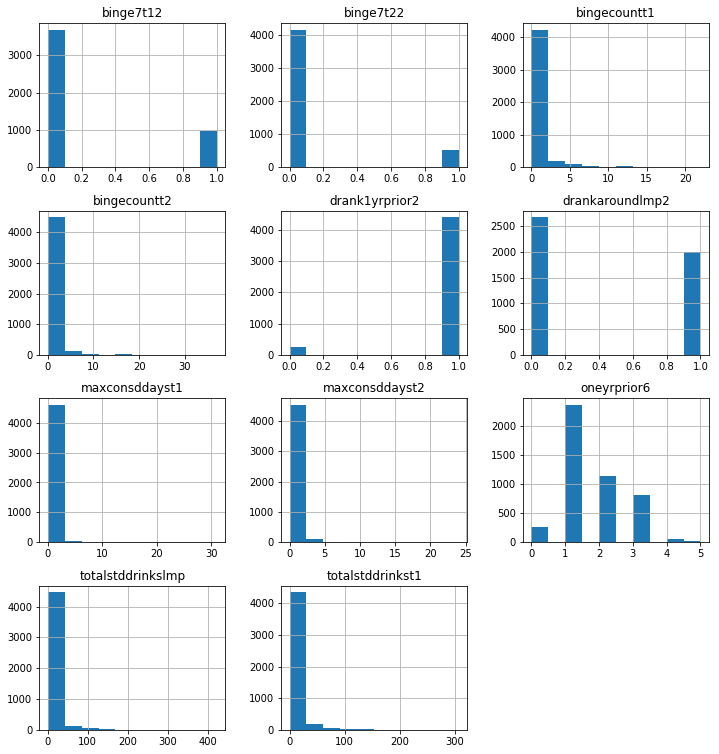

In [705]:
adalc = pd.read_csv('../data/raw/adalc_patid_DB.csv', usecols=range(0,12))
adalc.columns = map(str.lower, adalc.columns)
# Viz
adalc.replace(-999999,np.nan).dropna().hist(figsize=(12,13));

<font color='red' size=10>
    <b>adcdrisc_DB.csv</b>
</font>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani specifies to keep only the following vars:
* CDRISC_Raw

This is the only var specified in tab 2 ("Demographic Variables Kept") as well.

<br>

<font style="background-color:yellow;">
    <b>IMPORTANT</b>: Though Dani was mostly successful in removing NaNs/Nulls, it seems some have made it 
through, e.g., the following code identifies index 1800 as having the value "#NULL!" 
</font>
(more about how I discovered it in the analysis section below this summary):

```python
adcdrisc = pd.read_csv('../data/raw/adcdrisc_DB.csv')
null_index = adcdrisc.CDRISC_Raw.str.contains('NULL')
adcdrisc.CDRISC_Raw[null_index]
```



### FINAL Code for this Table
-------------------------------
```python
adcdrisc = pd.read_csv('../data/raw/adcdrisc_DB.csv', usecols=['patid','CDRISC_Raw'], 
                       na_values='#NULL!')
adcdrisc.columns = map(str.lower, adcdrisc.columns)
adcdrisc.fillna(-999999, inplace=True)
```
--------------------------------

In [170]:
adcdrisc = pd.read_csv('../data/raw/adcdrisc_DB.csv')

In [171]:
adcdrisc.shape

(1824, 7)

In [172]:
adcdrisc.head()

,patid,patid.1,cycleID,ownerTypeID,CDRISC_Date,CDRISC_nmiss,CDRISC_Raw
0,S002-BISH-04055,BISH,15,0,25-May-12,0,0.00
1,S002-BISH-00373,BISH,15,0,26-May-08,0,20.00
2,S002-BISH-05524,BISH,15,0,27-Aug-13,0,20.00
3,S002-BISH-00742,BISH,15,0,11-Dec-08,0,22.00
4,S002-BISH-00450,BISH,15,0,7-Jul-08,1,22.92


In [173]:
adcdrisc.tail()

,patid,patid.1,cycleID,ownerTypeID,CDRISC_Date,CDRISC_nmiss,CDRISC_Raw
1819,S002-BISH-06124,BISH,20,0,30-Jun-14,0,84.00
1820,S002-BISH-06628,BISH,20,0,2-Feb-15,0,89.00
1821,S002-BISH-00815,BISH,20,0,20-Jan-09,0,90.00
1822,S002-BISH-02437,BISH,20,0,9-Dec-10,0,94.00
1823,S002-BISH-00097,BISH,20,0,7-Dec-07,0,100.00


In [175]:
adcdrisc.isnull().sum()

patid           0
patid.1         0
cycleID         0
ownerTypeID     0
CDRISC_Date     0
CDRISC_nmiss    0
CDRISC_Raw      0
dtype: int64

In [176]:
adcdrisc = pd.read_csv('../data/raw/adcdrisc_DB.csv', usecols=['patid','CDRISC_Raw'])

In [180]:
adcdrisc.CDRISC_Raw.dtype

dtype('O')

When I saw that this was coming in as an object, I tried to coerce it to a float...but got an error:
```python
adcdrisc = pd.read_csv('../data/raw/adcdrisc_DB.csv', usecols=['patid','CDRISC_Raw'], 
                       dtype={'CDRISC_Raw': float})

    ValueError: could not convert string to float: '#NULL!'
```

In [198]:
null_index = adcdrisc.CDRISC_Raw.str.contains('NULL')

In [199]:
adcdrisc.CDRISC_Raw[null_index]

1800    #NULL!
Name: CDRISC_Raw, dtype: object

In [208]:
pd.read_csv('../data/raw/adcdrisc_DB.csv', usecols=['patid','CDRISC_Raw'], na_values='#NULL!').isnull().sum()

patid         0
CDRISC_Raw    1
dtype: int64

In [210]:
pd.read_csv('../data/raw/adcdrisc_DB.csv', usecols=['patid','CDRISC_Raw'], na_values='#NULL!').\
    fillna(-999999).isnull().sum()

patid         0
CDRISC_Raw    0
dtype: int64

Ok... So... When we import file noting that there exist a "#NULL!" value, CDRISC_Raw
now automatically comes in as a float -- as it should be.

In [211]:
adcdrisc = pd.read_csv('../data/raw/adcdrisc_DB.csv', usecols=['patid','CDRISC_Raw'], 
                       na_values='#NULL!')
adcdrisc.fillna(-999999, inplace=True)

In [213]:
adcdrisc.dtypes

patid          object
CDRISC_Raw    float64
dtype: object

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [823]:
print('N Records:', adcdrisc.shape[0])
print('N Unique PATIDs:', adcdrisc.patid.unique().shape[0])

N Records: 1824
N Unique PATIDs: 1824


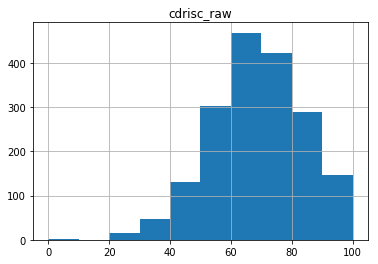

In [704]:
adcdrisc = pd.read_csv('../data/raw/adcdrisc_DB.csv', usecols=['patid','CDRISC_Raw'], 
                       na_values='#NULL!')
adcdrisc.columns = map(str.lower, adcdrisc.columns)
adcdrisc.fillna(-999999, inplace=True)
# Viz
adcdrisc.replace(-999999,np.nan).dropna().hist();

---------------------

<font color='red' size=10>
    <b>addrg_patid_DB.csv</b>
</font>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), 
* Dani does not specify to keep any of the vars from the `ADDRG_WEEK` database
* NOTE:  I cannot find any other "addrg" databases...
 
**HOWEVER**, many variables are listed in tab2 ("Demographic Variables Kept"):
* **Hair1YrPrior6**	-	How Much Hairspray Use in the 1 Year Prior to Pregnancy?
* **HairLMP2**	-	Any Hairspray Use around LMP
* **HairT12**	-	Hairspray Use in Trimester 1 (1 to 14 Weeks)
* **HairT22**	-	Hairspray Use in Trimester 2 (15 to 28 Weeks)
* **Hookah1YrPrior6**	-	How Much Hookah Use in the 1 Year Prior to Pregnancy?
* **HookahLMP2**	-	Any Hookah Use around LMP
* **HookahT12**	-	Hookah Use in Trimester 1 (1 to 14 Weeks)
* **HookahT22**	-	Hookah Use in Trimester 2 (15 to 28 Weeks)
* **Meth1YrPrior6**	-	How Much Methamphetamine Use in the 1 Year Prior to Pregnancy?
* **MethLMP2**	-	Any Methamphetamine Use around LMP
* **MethT12**	-	Methamphetamine Use in Trimester 1 (1 to 14 Weeks)
* **MethT22**	-	Methamphetamine Use in Trimester 2 (15 to 28 Weeks)
* **MJ1YrPrior6**	-	How Much Marijuana Use in the 1 Year Prior to Pregnancy?
* **MJLMP2**	-	Any Marijuana Use around LMP
* **MJT12**	-	Marijuana Use in Trimester 1 (1 to 14 Weeks)
* **MJT22**	-	Marijuana Use in Trimester 2 (15 to 28 Weeks)
* **Other1YrPrior2**	-	Any Other Drug Use 1 Year Prior
* **OtherLMP2**	-	Any Other Drug Use around LMP
* **OtherT12**	-	Other Drug Use in Trimester 1 (1 to 14 Weeks)
* **OtherT22**	-	Other Drug Use in Trimester 2 (15 to 28 Weeks)

<br>

<font style="background-color:yellow;">
    <b>IMPORTANT</b>:  Some of these variable have no nonzero/nonnull values.  That is,
other than missingness, a few of these vars are essentially constant.  
</font>

| Highly Imbalanced Feature | % Nonzero/NonNull | Number of Records (Total: 6924) |
|---------------------------|-------------------|---|
| hair1yrprior6   |     0.0% | 0 |
| hairlmp2        |     0.0% | 0 | 
| hairt12         |     0.0% | 0 |
| hairt22         |    0.03% | 2 |
| otherlmp2       |     0.1% | 7 |
| othert12        |     0.2% | 14|
| othert22        |    0.23% | 16|
| other1yrprior2  |    0.29% | 20|
| methlmp2        |    0.78% | 54|



<ol style="background-color:yellow;">
    <li>The vars w/o variation should be discarded.</li>
    <li>The var w/ only 2 records (hairt22) should be discarded (cannot split it into trn/val/tst).</li>
    <li>If we care about the remaining vars, then we need to ensure they are split balanced into
        trn/val/tst sets...but not only balanced in number, but in distribution (e.g., it is useless
        if we have 4 otherlmp2 values all 0 in training, but have 3 remaining values of 1 split into
        val and tst sets.  <b>This might take some finesse and time, which we might not have.</b></li>
</ol>
    
<br>
<font style="background-color:sandybrown;">
    <b>UPDATE (Dec 4, mtg w/ Dani)</b>: Dani agrees that most, if not all, of these variable can
    be dropped.  In fact, she already did drop them by not including them in tab1 of her Excel
    file.  As I've explained in other updates elsewhere in this JNB, I misinterpreted the
    tabs, thinking tab1 was exploratory and tab2 was the final decision (it was actually the
    other way around). <b>ACTION</b>: drop almost all of these vars; if you keep any, plan on
    devising an appropriate split-balancing scheme.
</font>

### FINAL Code
-------------------------------------
```python
addrg_cols = [ 'patid',
    'Hair1YrPrior6', 'HairLMP2', 'HairT12', 'HairT22',
    'Hookah1YrPrior6', 'HookahLMP2', 'HookahT12', 'HookahT22',
    'Meth1YrPrior6', 'MethLMP2', 'MethT12', 'MethT22',
    'MJ1YrPrior6', 'MJLMP2', 'MJT12', 'MJT22',
    'Other1YrPrior2', 'OtherLMP2', 'OtherT12', 'OtherT22',
]
addrg = pd.read_csv('../data/raw/addrg_patid_DB.csv',
                   usecols = addrg_cols)
addrg.columns = map(str.lower, addrg.columns)
```
--------------------------------

In [328]:
addrg = pd.read_csv('../data/raw/addrg_patid_DB.csv')

In [216]:
addrg.shape

(6924, 113)

In [217]:
addrg.head()

,patid,patid.1,AnyDrugs2,AnyMJ2,AnyMeth2,AnyHair2,AnyHookah2,AnyOther2,AnyMJMeth2,MJ1YrPrior2,...,TotOtherPreg,TotOtherLMP,TotOtherT1,TotOtherT2,TotOtherT3,TotOtherPost,TotOther12wks,TotOther19wks,TotOther20wks,TotOther28wks
0,S002-BISH-00001,BISH,0.0,0.0,0.0,0.0,-999999.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-999999.0,0.0,0.0,0.0,0.0
1,S002-BISH-00002,BISH,0.0,0.0,0.0,0.0,-999999.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,S002-BISH-00003,BISH,0.0,0.0,0.0,0.0,-999999.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,S002-BISH-00004,BISH,0.0,0.0,0.0,0.0,-999999.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,S002-BISH-00005,BISH,0.0,0.0,0.0,0.0,-999999.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
addrg.tail()

,patid,patid.1,AnyDrugs2,AnyMJ2,AnyMeth2,AnyHair2,AnyHookah2,AnyOther2,AnyMJMeth2,MJ1YrPrior2,...,TotOtherPreg,TotOtherLMP,TotOtherT1,TotOtherT2,TotOtherT3,TotOtherPost,TotOther12wks,TotOther19wks,TotOther20wks,TotOther28wks
6919,S002-BISH-07058,BISH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6920,S002-BISH-07059,BISH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6921,S002-BISH-07060,BISH,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6922,S002-BISH-07061,BISH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6923,S002-BISH-07062,BISH,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
addrg.columns

Index(['patid', 'patid.1', 'AnyDrugs2', 'AnyMJ2', 'AnyMeth2', 'AnyHair2',
       'AnyHookah2', 'AnyOther2', 'AnyMJMeth2', 'MJ1YrPrior2',
       ...
       'TotOtherPreg', 'TotOtherLMP', 'TotOtherT1', 'TotOtherT2', 'TotOtherT3',
       'TotOtherPost', 'TotOther12wks', 'TotOther19wks', 'TotOther20wks',
       'TotOther28wks'],
      dtype='object', length=113)

In [331]:
[item for item in addrg.columns if 'hair1y' in item.lower()]

['Hair1YrPrior2', 'Hair1YrPrior6']

In [336]:
# Use only cols that are greenlisted
addrg_cols = [ 'patid',
    'Hair1YrPrior6', 'HairLMP2', 'HairT12', 'HairT22',
    'Hookah1YrPrior6', 'HookahLMP2', 'HookahT12', 'HookahT22',
    'Meth1YrPrior6', 'MethLMP2', 'MethT12', 'MethT22',
    'MJ1YrPrior6', 'MJLMP2', 'MJT12', 'MJT22',
    'Other1YrPrior2', 'OtherLMP2', 'OtherT12', 'OtherT22',
]

addrg = pd.read_csv('../data/raw/addrg_patid_DB.csv',
                   usecols = addrg_cols)

addrg.dtypes

patid               object
MJ1YrPrior6        float64
MJLMP2             float64
MJT12              float64
MJT22              float64
Meth1YrPrior6      float64
MethLMP2           float64
MethT12            float64
MethT22            float64
Hair1YrPrior6      float64
HairLMP2           float64
HairT12            float64
HairT22            float64
Hookah1YrPrior6    float64
HookahLMP2         float64
HookahT12          float64
HookahT22          float64
Other1YrPrior2     float64
OtherLMP2          float64
OtherT12           float64
OtherT22           float64
dtype: object

In [337]:
addrg.describe()[3:]

,MJ1YrPrior6,MJLMP2,MJT12,MJT22,Meth1YrPrior6,MethLMP2,MethT12,MethT22,Hair1YrPrior6,HairLMP2,HairT12,HairT22,Hookah1YrPrior6,HookahLMP2,HookahT12,HookahT22,Other1YrPrior2,OtherLMP2,OtherT12,OtherT22
min,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.0,-999999.0,-999999.0,-999999.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.0,-999999.0,-999999.0,-999999.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [339]:
addrg.isnull().sum().sum()  # no "traditional" nulls

0

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [824]:
print('N Records:', addrg.shape[0])
print('N Unique PATIDs:', addrg.patid.unique().shape[0])

N Records: 6924
N Unique PATIDs: 6924


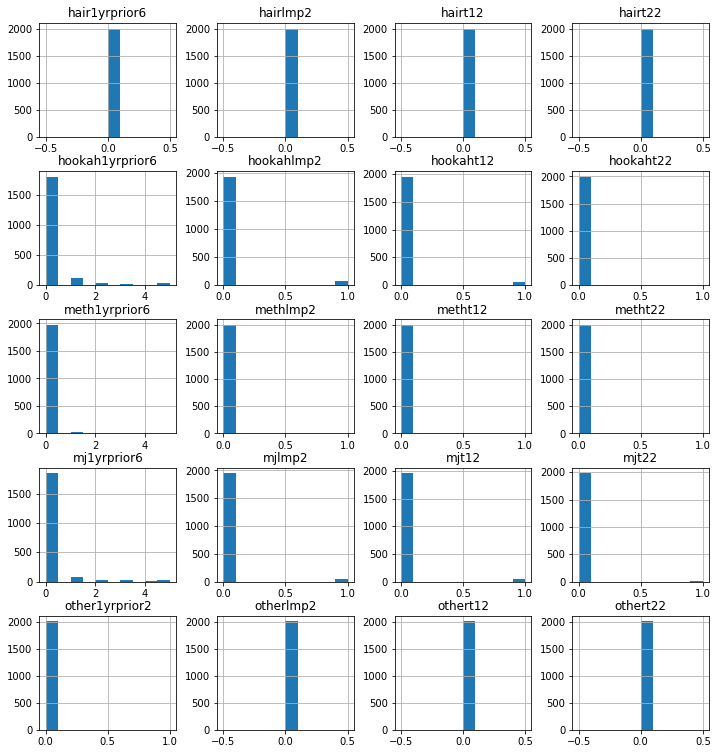

In [726]:
# Final
addrg_cols = [ 'patid',
    'Hair1YrPrior6', 'HairLMP2', 'HairT12', 'HairT22',
    'Hookah1YrPrior6', 'HookahLMP2', 'HookahT12', 'HookahT22',
    'Meth1YrPrior6', 'MethLMP2', 'MethT12', 'MethT22',
    'MJ1YrPrior6', 'MJLMP2', 'MJT12', 'MJT22',
    'Other1YrPrior2', 'OtherLMP2', 'OtherT12', 'OtherT22',
]
addrg = pd.read_csv('../data/raw/addrg_patid_DB.csv',
                   usecols = addrg_cols)
addrg.columns = map(str.lower, addrg.columns)
# Viz
addrg.replace(-999999,np.nan).dropna().hist(figsize=(12,13));

### How many nonzero/nonnull entries per feature?

In [735]:
print('Addrg Record Count:', len(addrg))
addrg.drop('patid',axis=1).replace(-999999,0).applymap(lambda x: 1 if x!=0 else 0).sum()

Addrg Record Count: 6924


mj1yrprior6        327
mjlmp2             167
mjt12              321
mjt22              335
meth1yrprior6      101
methlmp2            54
metht12            143
metht22            200
hair1yrprior6        0
hairlmp2             0
hairt12              0
hairt22              2
hookah1yrprior6    338
hookahlmp2         174
hookaht12          329
hookaht22          235
other1yrprior2      20
otherlmp2            7
othert12            14
othert22            16
dtype: int64

In [734]:
print('Percent of Nonzero/Nonnull Values:')
addrg.drop('patid',axis=1).replace(-999999,0).applymap(lambda x: 1 if x!=0 else 0).sum().\
    map(lambda x: round(x*100/len(addrg), 2)).map(lambda x: str(x)+'%')

Percent of Nonzero/Nonnull Values:


mj1yrprior6        4.72%
mjlmp2             2.41%
mjt12              4.64%
mjt22              4.84%
meth1yrprior6      1.46%
methlmp2           0.78%
metht12            2.07%
metht22            2.89%
hair1yrprior6       0.0%
hairlmp2            0.0%
hairt12             0.0%
hairt22            0.03%
hookah1yrprior6    4.88%
hookahlmp2         2.51%
hookaht12          4.75%
hookaht22          3.39%
other1yrprior2     0.29%
otherlmp2           0.1%
othert12            0.2%
othert22           0.23%
dtype: object

---------------------------------------------------

<font color='red' size=10>
    <b>adedin_merged_edit_bish</b>
</font>

<br>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables") and tab2 ("Demographic Variables Kept"), Dani 
green lights the following vars:
* **EDINBURGH_Raw_All-10-15-20** - "Edinburgh Depression Scale Total Score"
    - <i> renamed EDINBURGH in some of the code below </i>
    - NOTE FROM DANI:  "No outliers - Few missing - Built by DB!"
* **CycleID_All-10-15-20** - cycle ID
    - renamed CycleID in some of the code below
    - **NOTE**: this var is semi-optional:  (i) Bill Fifer actually said it's likely
      an ok approximation to ignore Cycle ID on the mental health vars and treat
      the var as applicable over the full term of the pregnanacy (independent of
      when they were measured), which means we wouldn't use this varialbe;  however,
      (ii) Dani was interested in keeping it as a potential interaction var, where
      something like a random forest can make more intelligent decisions based on 
      it.  



<br>
<font style="background-color:yellow;">
    <b>IMPORTANT</b>: NaN detected, despite Dani's filtering procedures...
</font>


```python
adedin_merged_edit_bish.query(f"EDINBURGH not in {list(range(0,31)) + [-999999]}")

        patid	        EDINBURGH	CycleID
4823	S002-BISH-05186	NaN	        10
```

<br><br>
<font style="background-color:sandybrown;">
    <b>UPDATE (Dec 4, mtg w/ Dani)</b>:  After playing with the data enough, Dani agrees
    with Bill Fifer that Edinburgh measurements are stable enough (at least in distribution)
    to assume they are stable enough for an individual over several month to consider
    them constant, thus not needing the measurement's GA.  However, if we're using a random
    forest and it doesn't hurt, there is no hugely pressing need to drop the var.  Player's
    choice!
</font>

### FINAL Code
------------------------------
```python
adedin_merged_edit_bish = pd.read_csv('../data/raw/adedin_merged_edit_bish_DB.csv')
adedin_merged_edit_bish.columns = ['patid', 'edinburgh', 'edinburgh_cycle_id']
adedin_merged_edit_bish.fillna(-999999, inplace=True)
```
------------------------------

In [236]:
adedin_merged_edit_bish = pd.read_csv('../data/raw/adedin_merged_edit_bish_DB.csv')

In [238]:
adedin_merged_edit_bish.shape

(6588, 3)

In [240]:
adedin_merged_edit_bish.columns

Index(['patid', 'EDINBURGH_Raw_All-10-15-20_DB', 'CycleID_All-10-15-20_DB'], dtype='object')

In [283]:
list(map(lambda x: x.split('_')[0], adedin_merged_edit_bish.columns))

['patid', 'EDINBURGH', 'CycleID']

In [284]:
adedin_merged_edit_bish.columns = map(lambda x: x.split('_')[0], adedin_merged_edit_bish.columns)

In [285]:
adedin_merged_edit_bish.head()

,patid,EDINBURGH,CycleID
0,S002-BISH-00001,5.0,10
1,S002-BISH-00002,25.0,10
2,S002-BISH-00003,13.0,10
3,S002-BISH-00004,5.0,10
4,S002-BISH-00005,13.0,20


In [286]:
adedin_merged_edit_bish.tail()

,patid,EDINBURGH,CycleID
6583,S002-BISH-07058,18.0,10
6584,S002-BISH-07059,17.0,20
6585,S002-BISH-07060,15.0,10
6586,S002-BISH-07061,8.0,10
6587,S002-BISH-07062,23.0,20


In [340]:
adedin_merged_edit_bish.describe()[3:]

,EDINBURGH,CycleID
min,-999999.0,-999999.0
25%,9.0,10.0
50%,13.0,10.0
75%,17.0,20.0
max,30.0,20.0


In [349]:
if adedin_merged_edit_bish.isnull().sum().sum() > 0:
    print(adedin_merged_edit_bish.isnull().sum())
else:
    print("Nothing to see here!")

patid        0
EDINBURGH    1
CycleID      0
dtype: int64


In [359]:
adedin_merged_edit_bish.query(
    "EDINBURGH not in [-999999,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]"
)

,patid,EDINBURGH,CycleID
4823,S002-BISH-05186,NaN,10


In [311]:
adedin_merged_edit_bish.query(f"EDINBURGH not in {list(range(0,31)) + [-999999]}")

,patid,EDINBURGH,CycleID
4823,S002-BISH-05186,NaN,10


In [369]:
# Check that we removed the one NaN
len(adedin_merged_edit_bish.query(f"edinburgh not in {list(range(0,31)) + [-999999]}"))

0

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [825]:
print('N Records:', adedin_merged_edit_bish.shape[0])
print('N Unique PATIDs:', adedin_merged_edit_bish.patid.unique().shape[0])

N Records: 6588
N Unique PATIDs: 6588


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134de6b38>,
      dtype=object)

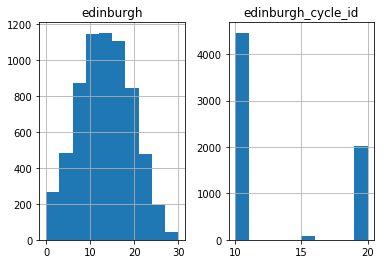

In [737]:
# Final
adedin_merged_edit_bish = pd.read_csv('../data/raw/adedin_merged_edit_bish_DB.csv')
adedin_merged_edit_bish.columns = ['patid', 'edinburgh', 'edinburgh_cycle_id']
adedin_merged_edit_bish.fillna(-999999, inplace=True)
# Viz
adedin_merged_edit_bish.replace(-999999,np.nan).dropna().hist()

------------------------------

<font color='red' size=10>
    <b>adelig_DB.csv</b>
</font>

<br>
<font size=4 style="background-color:sandybrown;">
    <b>UPDATE 1 (Dec 4, mtg w/ Dani)</b>: My misinterpretation of the Excel tabs, DV/tab1 and DVK/tab2,
    affect this code's logic.  To summarize, DVK/tab2 was exploratory while DV/tab1 was the final say; I
    interpreted these tabs oppositely.  Dani already knew <font style="font-family:'Courier New';font-weight:bold;">
    hispanic2</font> was a bad variable (constant, no variation).  She actually wanted me to pluck
    the vars she listed in tab1, <font style="font-family:'Courier New';font-weight:bold;">raceai4</font>
    and <font style="font-family:'Courier New';font-weight:bold;">racenih7</font>
</font>

<br>
<font size=4 style="background-color:sandybrown;">
    <b>UPDATE 2</b>:  Here we have <font style="font-family:'Courier New';font-weight:bold;">MAT_AGE</font>
    (maternal age), while in the ADSTAI table we have another age variable that records the mother's
    age when she completed the anxiety test/questionnaire.  I suspected these two vars were completely
    redundant, even if off by up to a year (e.g., mother enrolls in study at 37, has birthday a month
    later, then takes anxiety test a month after that at 38).  Dani agreed; there was no special
    reason to keep both; just an oversight.  
</font>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani suggests keeping the following vars:
* **MAT_AGE** - Maternal Age (years)
* **RACEAI4** - Maternal Race (1: "American Indian or Alaska Native", 2: "Mixed Ancestry",
  3: "White", 4: "Other/Unknown")
* **RACENIH7** - "Maternal Race, NIH Definition (1: "American Indian or Alaskan Native",
  2: "Asian", 3: "Black or African American", 4: "Mixed Ancestry",
  5: "Native Hawaiian or other Pacific Islander", 6: "White", 7: "Other/Unknown")

However, in tab 2 ("Demographic Variables Kept"), Dani only keeps two of the vars:
* **Hispanic2** - Maternal, Hispanic/Latina (binary var)
* **MAT_AGE** - Maternal Age (years)


<br>
<font style="background-color:yellow;">
    <b>IMPORTANT</b>: the `hispanic2` var is essentially CONSTANT -- it is either zero or missing.
</font>

```python
adelig.hispanic2.replace(-999999,0).sum()
    0
```


### FINAL Code
------------------------
```python
adelig = pd.read_csv('../data/raw/adelig_DB.csv', 
                     usecols = ['patid', 'Hispanic2', 'MAT_AGE'])
adelig.columns = map(str.lower, adelig.columns)
```
------------------

In [983]:
adelig = pd.read_csv('../data/raw/adelig_DB.csv', 
                     usecols = ['patid', 'Hispanic2', 'MAT_AGE'])
adelig.columns = map(str.lower, adelig.columns)

In [828]:
adelig.shape

(6924, 3)

In [829]:
adelig.columns

Index(['patid', 'mat_age', 'hispanic2'], dtype='object')

In [830]:
adelig.head()

,patid,mat_age,hispanic2
0,S002-BISH-00001,24.0,0.0
1,S002-BISH-00002,26.0,0.0
2,S002-BISH-00003,17.0,0.0
3,S002-BISH-00004,24.0,0.0
4,S002-BISH-00005,22.0,0.0


In [831]:
adelig.tail()

,patid,mat_age,hispanic2
6919,S002-BISH-07058,24.0,0.0
6920,S002-BISH-07059,19.0,0.0
6921,S002-BISH-07060,26.0,0.0
6922,S002-BISH-07061,24.0,0.0
6923,S002-BISH-07062,17.0,0.0


In [832]:
adelig.describe()[3:]

,mat_age,hispanic2
min,15.0,0.0
25%,20.0,0.0
50%,24.0,0.0
75%,29.0,0.0
max,45.0,0.0


In [833]:
adelig.isnull().sum()

patid        0
mat_age      0
hispanic2    0
dtype: int64

In [834]:
adelig.dtypes

patid         object
mat_age      float64
hispanic2    float64
dtype: object

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [835]:
print('N Records:', adelig.shape[0])
print('N Unique PATIDs:', adelig.patid.unique().shape[0])

N Records: 6924
N Unique PATIDs: 6924


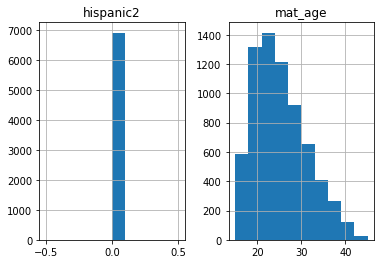

In [836]:
# Final Code
adelig = pd.read_csv('../data/raw/adelig_DB.csv', usecols = ['Hispanic2', 'MAT_AGE'])
adelig.columns = map(str.lower, adelig.columns)
# Viz
adelig.hist();

In [837]:
# WTF?  the `hispanic2` var is either zero or missing...
adelig.hispanic2.replace(-999999,0).sum()

0.0

-----------------

<font color='red' size=6>
    <b>adfetalgrowth_BISHCORRECTED_01.24.19_persex_DB.csv</b>
</font>

<br><br>
<font style="background-color:sandybrown;">
    <b>UPDATE (Dec 4, mtg w/ Dani)</b>: Despite my misunderstanding of tab1/DemVar and tab2/DemVarKept,
    this is one of those tables that breaks the mold and actually fit my understanding.  To be clear,
    we do not want the tab1 vars listed here (DB index name, USDT, USGAWeeks); we want the tab2 
    vars (sex, deviation index).  This inconsistency is one of the reasons why Dani is creating a 
    V3 of that Excel file and I'm creating a companion notebook to this JNB (02a__KU__2019-Dec-04__...).
</font>


In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani greenlights the following vars for
further inspection:
* **DB index name** - Percentile of standard curve per sex
* **USDT** - Date of ultrasound
* **USGAWeeks** - Gestational age at ultrasound (full weeks)

In tab 2 of that file ("Demographic Variables Kept"), she greenlights the same 3 vars... However,
she then does quite a bit of cleaning up, leaving me with a CSV file that has 2 main vars:
* **sex** (1:M, 2:F, 3:Unknown)
* **Deviation Index** -- quantifies how far off the average growth chart 
  the baby's measurements were throughout the first two terms of the pregnancy

<br>

**NOTE**: For whatever reason, this file drags in some blank columns with it ("Unnamed: 3", 
"Unnamed: 4").  This must have something to do w/ Excel CSV files retaining extra bullshit... Anyway,
no big deal to clean up.


### FINAL Code
------------------------------------
```python
adfetalgrowth = pd.read_csv('../data/raw/adfetalgrowth_BISHCORRECTED_01.24.19_persex_DB.csv',
                           usecols = range(0,3))
adfetalgrowth.columns = ['patid', 'sex', 'growth_deviation_index']
```
----------------------------------------

In [387]:
adfetalgrowth = pd.read_csv('../data/raw/adfetalgrowth_BISHCORRECTED_01.24.19_persex_DB.csv')

In [389]:
adfetalgrowth.head()

,patid,"Sex (: Male, 2: Female, 3: Unknown)",Deviation Index,Unnamed: 3,Unnamed: 4
0,S002-BISH-00001,2.0,-0.446033,NaN,NaN
1,S002-BISH-00002,1.0,-999999.000000,NaN,NaN
2,S002-BISH-00003,1.0,-0.071501,NaN,NaN
3,S002-BISH-00004,2.0,0.026115,NaN,NaN
4,S002-BISH-00005,1.0,-999999.000000,NaN,NaN


In [400]:
adfetalgrowth = pd.read_csv('../data/raw/adfetalgrowth_BISHCORRECTED_01.24.19_persex_DB.csv',
                           usecols = range(0,3))
adfetalgrowth.columns = map(lambda x: x.lower().split()[0], adfetalgrowth.columns)

In [401]:
adfetalgrowth.head()

,patid,sex,deviation
0,S002-BISH-00001,2.0,-0.446033
1,S002-BISH-00002,1.0,-999999.000000
2,S002-BISH-00003,1.0,-0.071501
3,S002-BISH-00004,2.0,0.026115
4,S002-BISH-00005,1.0,-999999.000000


In [402]:
adfetalgrowth.tail()

,patid,sex,deviation
6644,S002-BISH-07058,3.0,-0.059187
6645,S002-BISH-07059,3.0,0.051131
6646,S002-BISH-07060,3.0,-0.051975
6647,S002-BISH-07061,3.0,0.181527
6648,S002-BISH-07062,3.0,-0.276106


In [403]:
adfetalgrowth.describe()[3:]

,sex,deviation
min,1.0,-999999.000000
25%,1.0,-0.144570
50%,2.0,-0.045131
75%,2.0,0.012593
max,3.0,2.837204


In [404]:
adfetalgrowth.isnull().sum()

patid        0
sex          0
deviation    0
dtype: int64

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [840]:
print('N Records:', adfetalgrowth.shape[0])
print('N Unique PATIDs:', adfetalgrowth.patid.unique().shape[0])

N Records: 6649
N Unique PATIDs: 6649


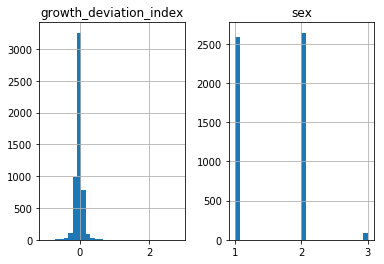

In [954]:
# Final Code
adfetalgrowth = pd.read_csv('../data/raw/adfetalgrowth_BISHCORRECTED_01.24.19_persex_DB.csv',
                           usecols = range(0,3))
adfetalgrowth.columns = ['patid', 'sex', 'growth_deviation_index']
# Viz
adfetalgrowth.replace(-999999,np.nan).dropna().hist(bins=30);

In [956]:
# Q:  Should we be concerned about this outlier (~2.83)?
adfetalgrowth.growth_deviation_index.describe()[3:]

# Dani will re-check file for other outliers...and leave them in.  Then, if we want,
# I'll remove them.

min   -999999.000000
25%        -0.144570
50%        -0.045131
75%         0.012593
max         2.837204
Name: growth_deviation_index, dtype: float64

-------------------

<font color='red' size=10>
    <b>admh_DB.csv</b>
</font>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani greenlights most of the vars for futher inspection (see Excel file
for var definitions):
* AbruptionPrior2
* AbruptionPriorFP2
* ANEMIA3
* AnxietyPrior2
* APSPrior2
* BloodClotPrior2
* CancerPrior2
* CesareanPrior2
* ConnectiveTissueDisorderPrior2
* DepressionPrior2
* DiabetesPrior2
* EpilepsyPrior2
* GDMPrior2
* GDMPriorFP2
* HeartDisPrior2
* HepatitisPrior2
* HTNNotPregPrior2
* HTNPregPrior2
* HTNPregPriorFP2
* HX_Baby_Cleft2
* HX_Baby_Down2
* HX_Baby_fas2
* HX_Baby_Heart2
* HX_Baby_HypoxiaEncep2
* HX_Baby_IUGRSGA2
* HX_Baby_Jaundice2
* HX_Baby_NeuralTube2
* HX_Baby_NICU2
* HX_Baby_pfas2
* HX_Baby_PoorWeight2
* HX_Baby_Retard2
* HX_Baby_Shoulder2
* HXAB2
* HXFT2
* HXID2
* HXLB2
* HXMC2
* HXNT2
* HXPT2
* HXSB2
* HXSIDS2
* HXSIDSSUID2
* HXSUID2
* HyperthyroidPrior2
* HypothyroidPrior2
* LupusPrior2
* PlacentaPreviaPrior2
* PlacentaPreviaPriorFP2
* PPROMPrior2
* PPROMPriorFP2
* RAPrior2
* RenalDisPrior2
* SickleCellAnemiaPrior2
* tbprior2
* ThromboembolicDiseasePrior2


Similarly, in tab 2 ("Demographic Variables Kept"), there are a lot of
vars... So many that I cannot eyeball it!  The same is true for the vars that
are actually in the associated CSV file.  

For all the gory details, see the set analysis below.

For a quick summary, note that
* tab2 contains one more var than tab1 (`ANEMIA2`)
* the CSV file contains 4 more vars than tab2 (`AnemiaPriorFP2`, `ANEMIAacute2`, `ANEMIAchronic2`, `AnemiaPrior2`)

<font style="background-color:yellow;">
<b>GOING FORWARD</b>: I am pretty sure that I am supposed to only take vars that are
listed in tab2, so I will ignore the 4 extra vars in the CSV file (<b>follow up w/ Dani</b>).
</font><font style="background-color:sandybrown;"><b>UPDATE (Dec4)</b>: No, I was technically
    wrong here.  It was the tab1 vars that mattered (see various updates throughout notebook).</font>

<br><br>
<font size=4 style="background-color:lightcoral;">
    <b>IMPORTANT</b>: Many of these vars should likely be dropped, e.g., see histograms
    at end of this analysis section.  Each of the var listed below have less than
    50 nonZero/nonNull instances (out of nearly 7k records):
</font>
```
       'hxsuid2', 'hxsids2', 'hxsidssuid2', 'hx_baby_cleft2', 'hx_baby_down2',
       'hx_baby_fas2', 'hx_baby_pfas2', 'hx_baby_heart2',
       'hx_baby_hypoxiaencep2', 'hx_baby_iugrsga2', 'hx_baby_retard2',
       'hx_baby_neuraltube2', 'hx_baby_poorweight2', 'hx_baby_shoulder2',
       'sicklecellanemiaprior2', 'apsprior2', 'anxietyprior2',
       'bloodclotprior2', 'cancerprior2', 'connectivetissuedisorderprior2',
       'gdmprior2', 'gdmpriorfp2', 'hyperthyroidprior2', 'hypothyroidprior2',
       'lupusprior2', 'abruptionprior2', 'abruptionpriorfp2',
       'placentapreviaprior2', 'placentapreviapriorfp2', 'ppromprior2',
       'pprompriorfp2', 'raprior2', 'thromboembolicdiseaseprior2'
```

### FINAL Code
-------------------------
```python
drop_vars = ['patid.1', 'AnemiaPriorFP2', 'ANEMIAacute2', 'ANEMIAchronic2', 'AnemiaPrior2']
admh = pd.read_csv('../data/raw/admh_DB.csv')
admh.drop(drop_vars, axis=1, inplace=True)
admh.columns = map(str.lower, admh.columns)
```
--------------------------

In [420]:
tab1vars = {'AbruptionPrior2', 'AbruptionPriorFP2', 'ANEMIA3', 'AnxietyPrior2',
    'APSPrior2', 'BloodClotPrior2', 'CancerPrior2', 'CesareanPrior2',
    'ConnectiveTissueDisorderPrior2', 'DepressionPrior2', 'DiabetesPrior2',
    'EpilepsyPrior2', 'GDMPrior2', 'GDMPriorFP2', 'HeartDisPrior2',
    'HepatitisPrior2', 'HTNNotPregPrior2', 'HTNPregPrior2', 'HTNPregPriorFP2',
    'HX_Baby_Cleft2', 'HX_Baby_Down2', 'HX_Baby_fas2', 'HX_Baby_Heart2',
    'HX_Baby_HypoxiaEncep2', 'HX_Baby_IUGRSGA2', 'HX_Baby_Jaundice2',
    'HX_Baby_NeuralTube2', 'HX_Baby_NICU2', 'HX_Baby_pfas2',
    'HX_Baby_PoorWeight2', 'HX_Baby_Retard2', 'HX_Baby_Shoulder2',
    'HXAB2', 'HXFT2', 'HXID2', 'HXLB2', 'HXMC2', 'HXNT2', 'HXPT2',
    'HXSB2', 'HXSIDS2', 'HXSIDSSUID2', 'HXSUID2', 'HyperthyroidPrior2',
    'HypothyroidPrior2', 'LupusPrior2', 'PlacentaPreviaPrior2',
    'PlacentaPreviaPriorFP2', 'PPROMPrior2', 'PPROMPriorFP2', 'RAPrior2',
    'RenalDisPrior2', 'SickleCellAnemiaPrior2', 'tbprior2',
    'ThromboembolicDiseasePrior2',
}
tab2vars = {'AbruptionPrior2', 'AbruptionPriorFP2', 'ANEMIA2', 'ANEMIA3',
    'AnxietyPrior2', 'APSPrior2', 'BloodClotPrior2', 'CancerPrior2',
    'CesareanPrior2', 'ConnectiveTissueDisorderPrior2', 'DepressionPrior2',
    'DiabetesPrior2', 'EpilepsyPrior2', 'GDMPrior2', 'GDMPriorFP2',
    'HeartDisPrior2', 'HepatitisPrior2', 'HTNNotPregPrior2',
    'HTNPregPrior2', 'HTNPregPriorFP2', 'HX_Baby_Cleft2', 'HX_Baby_Down2',
    'HX_Baby_fas2', 'HX_Baby_Heart2', 'HX_Baby_HypoxiaEncep2',
    'HX_Baby_IUGRSGA2', 'HX_Baby_Jaundice2', 'HX_Baby_NeuralTube2',
    'HX_Baby_NICU2', 'HX_Baby_pfas2', 'HX_Baby_PoorWeight2', 'HX_Baby_Retard2',
    'HX_Baby_Shoulder2', 'HXAB2', 'HXFT2', 'HXID2', 'HXLB2', 'HXMC2',
    'HXNT2', 'HXPT2', 'HXSB2', 'HXSIDS2', 'HXSIDSSUID2', 'HXSUID2',
    'HyperthyroidPrior2', 'HypothyroidPrior2', 'LupusPrior2',
    'PlacentaPreviaPrior2', 'PlacentaPreviaPriorFP2', 'PPROMPrior2',
    'PPROMPriorFP2', 'RAPrior2', 'RenalDisPrior2', 'SickleCellAnemiaPrior2',
    'tbprior2', 'ThromboembolicDiseasePrior2',
}
print('Vars in Tab1 that are not in Tab2:', tab1vars.difference(tab2vars))
print('Vars in Tab2 that are not in Tab1:', tab2vars.difference(tab1vars))

Vars in Tab1 that are not in Tab2: set()
Vars in Tab2 that are not in Tab1: {'ANEMIA2'}


So the "kept" vars include all of the ones greenlit for further inspection, plus
`ANEMIA2`.

<font style="background-color:lightyellow;">
    <b>NOTE</b> that the game is not over.  The associated CSV file also has a ton
    of variables, but are they all the same as `tab2vars`? 
    <b>Answer</b>: no they are not!
</font>

In [450]:
admh = pd.read_csv('../data/raw/admh_DB.csv')
csv_vars = set(admh.drop(['patid','patid.1'], axis=1).columns)
print('Vars in CSV that are not in Tab2:\n\t', csv_vars.difference(tab2vars))
print('\nVars in Tab2 that are not in CSV:\n\t', tab2vars.difference(csv_vars))

Vars in CSV that are not in Tab2:
	 {'ConnectivetissuedisorderPrior2', 'AnemiaPriorFP2', 'ANEMIAacute2', 'ANEMIAchronic2', 'AnemiaPrior2'}

Vars in Tab2 that are not in CSV:
	 {'ConnectiveTissueDisorderPrior2'}


<font style="background-color:lightyellow;">
    Notice that "connect tissue disorder prior 2" is actually in both sets, but differ
in terms of what letters are capitatlized...so let's do this one more time, but with all
varnames in lower case.
</font>

In [453]:
tab2vars_lc = set(pd.DataFrame(tab2vars, columns=['vars']).vars.str.lower().values.tolist())
csv_vars_lc = set(pd.DataFrame(csv_vars, columns=['vars']).vars.str.lower().values.tolist())
print('Vars in CSV that are not in Tab2:\n\t', csv_vars_lc.difference(tab1vars_lc))
print('\nVars in Tab2 that are not in CSV:\n\t', tab2vars_lc.difference(csv_vars_lc))

Vars in CSV that are not in Tab2:
	 {'anemiapriorfp2', 'anemiaacute2', 'anemiaprior2', 'anemiachronic2'}

Vars in Tab2 that are not in CSV:
	 set()


In [458]:
admh['patid.1'].unique()  # should also drop this var

array(['BISH'], dtype=object)

In [463]:
drop_vars = ['patid.1', 'AnemiaPriorFP2', 'ANEMIAacute2', 'ANEMIAchronic2', 'AnemiaPrior2']
admh = pd.read_csv('../data/raw/admh_DB.csv')
admh.drop(drop_vars, axis=1, inplace=True)
admh.columns = map(str.lower, admh.columns)

In [464]:
admh.columns

Index(['patid', 'hxft2', 'hxnt2', 'hxpt2', 'hxlb2', 'hxsb2', 'hxmc2', 'hxab2',
       'hxid2', 'hxsuid2', 'hxsids2', 'hxsidssuid2', 'hx_baby_cleft2',
       'hx_baby_down2', 'hx_baby_fas2', 'hx_baby_pfas2', 'hx_baby_heart2',
       'hx_baby_hypoxiaencep2', 'hx_baby_iugrsga2', 'hx_baby_jaundice2',
       'hx_baby_retard2', 'hx_baby_nicu2', 'hx_baby_neuraltube2',
       'hx_baby_poorweight2', 'hx_baby_shoulder2', 'anemia2', 'anemia3',
       'sicklecellanemiaprior2', 'apsprior2', 'anxietyprior2',
       'bloodclotprior2', 'cancerprior2', 'cesareanprior2',
       'connectivetissuedisorderprior2', 'depressionprior2', 'diabetesprior2',
       'epilepsyprior2', 'gdmprior2', 'gdmpriorfp2', 'heartdisprior2',
       'hepatitisprior2', 'htnnotpregprior2', 'htnpregprior2',
       'htnpregpriorfp2', 'hyperthyroidprior2', 'hypothyroidprior2',
       'lupusprior2', 'abruptionprior2', 'abruptionpriorfp2',
       'placentapreviaprior2', 'placentapreviapriorfp2', 'ppromprior2',
       'pprompriorfp2', 

In [467]:
admh.head(3)

,patid,hxft2,hxnt2,hxpt2,hxlb2,hxsb2,hxmc2,hxab2,hxid2,hxsuid2,...,abruptionprior2,abruptionpriorfp2,placentapreviaprior2,placentapreviapriorfp2,ppromprior2,pprompriorfp2,raprior2,renaldisprior2,thromboembolicdiseaseprior2,tbprior2
0,S002-BISH-00001,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,S002-BISH-00036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,S002-BISH-00040,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [468]:
admh.tail(3)

,patid,hxft2,hxnt2,hxpt2,hxlb2,hxsb2,hxmc2,hxab2,hxid2,hxsuid2,...,abruptionprior2,abruptionpriorfp2,placentapreviaprior2,placentapreviapriorfp2,ppromprior2,pprompriorfp2,raprior2,renaldisprior2,thromboembolicdiseaseprior2,tbprior2
6921,S002-BISH-00720,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
6922,S002-BISH-06240,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
6923,S002-BISH-07012,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0


In [469]:
admh.describe()[3:]

,hxft2,hxnt2,hxpt2,hxlb2,hxsb2,hxmc2,hxab2,hxid2,hxsuid2,hxsids2,...,abruptionprior2,abruptionpriorfp2,placentapreviaprior2,placentapreviapriorfp2,ppromprior2,pprompriorfp2,raprior2,renaldisprior2,thromboembolicdiseaseprior2,tbprior2
min,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
25%,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,...,-999999.0,0.0,-999999.0,0.0,-999999.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [471]:
admh.isnull().sum().sum()  # no "traditional" nulls

0

In [487]:
# No funny business w/ vars that should be floats (like the "#NULL!" thing that happened before)
[item for item in zip(admh.dtypes.index, admh.dtypes) if item[1] != float]

[('patid', dtype('O'))]

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [841]:
print('N Records:', admh.shape[0])
print('N Unique PATIDs:', admh.patid.unique().shape[0])

N Records: 6924
N Unique PATIDs: 6924


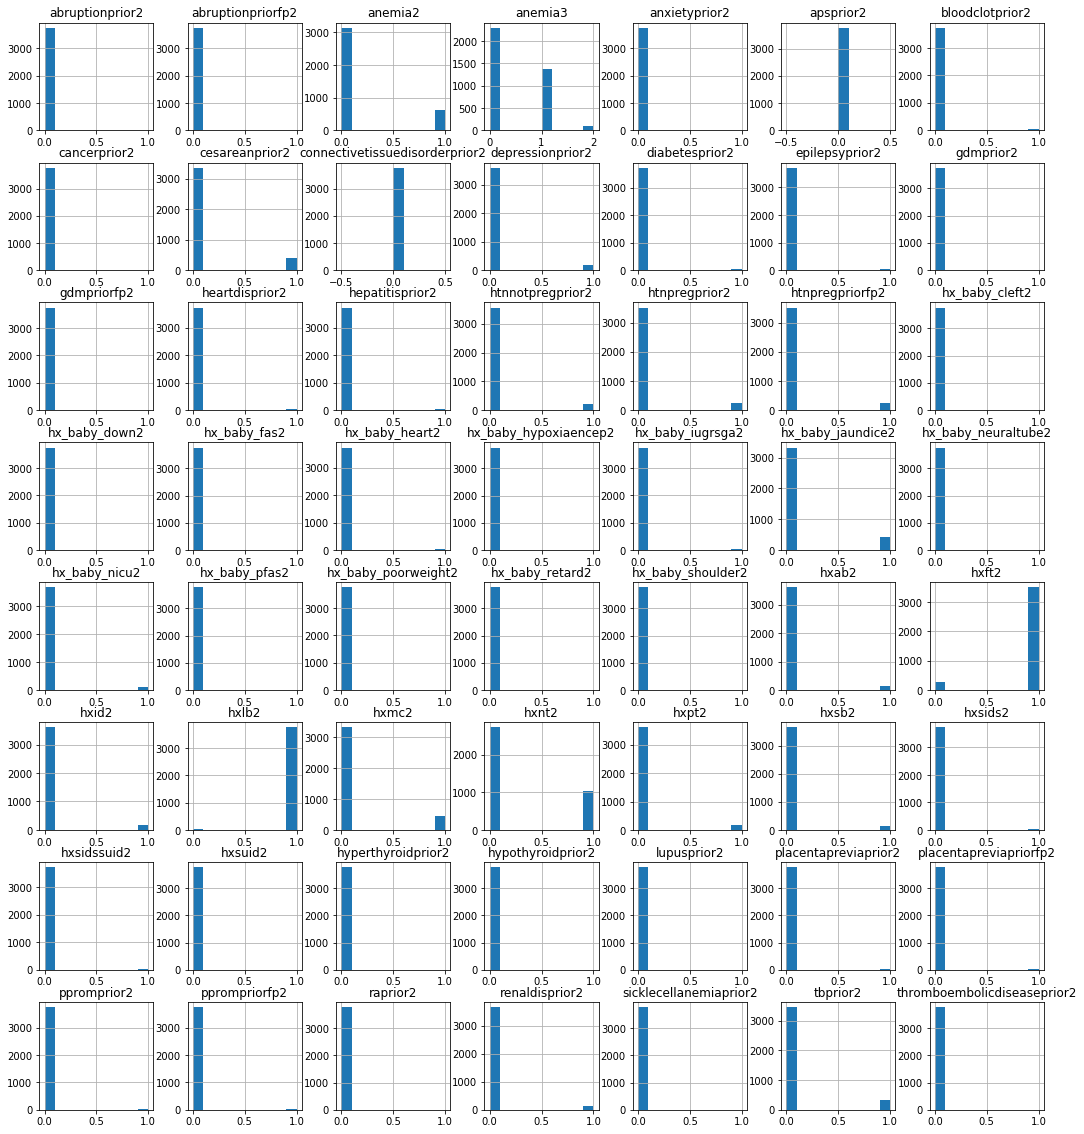

In [845]:
# Final Code
drop_vars = ['patid.1', 'AnemiaPriorFP2', 'ANEMIAacute2', 'ANEMIAchronic2', 'AnemiaPrior2']
admh = pd.read_csv('../data/raw/admh_DB.csv')
admh.drop(drop_vars, axis=1, inplace=True)
admh.columns = map(str.lower, admh.columns)
# Viz
admh.replace(-999999,np.nan).dropna().hist(figsize=(18,20));

In [856]:
print('ADMH Record Count:', len(admh))
admh_nznn = admh.drop('patid',axis=1).replace(-999999,0).applymap(lambda x: 1 if x!=0 else 0).sum()
admh_nznn

ADMH Record Count: 6924


hxft2                             3677
hxnt2                             1090
hxpt2                              195
hxlb2                             3928
hxsb2                              155
hxmc2                              636
hxab2                              251
hxid2                              175
hxsuid2                              5
hxsids2                             39
hxsidssuid2                         44
hx_baby_cleft2                       8
hx_baby_down2                       11
hx_baby_fas2                         3
hx_baby_pfas2                        1
hx_baby_heart2                      32
hx_baby_hypoxiaencep2               10
hx_baby_iugrsga2                    22
hx_baby_jaundice2                  455
hx_baby_retard2                      6
hx_baby_nicu2                      107
hx_baby_neuraltube2                  3
hx_baby_poorweight2                 12
hx_baby_shoulder2                    2
anemia2                           1212
anemia3                  

In [847]:
print('Percent of Nonzero/Nonnull Values:')
admh.drop('patid',axis=1).replace(-999999,0).applymap(lambda x: 1 if x!=0 else 0).sum().\
    map(lambda x: round(x*100/len(addrg), 2)).map(lambda x: str(x)+'%')

Percent of Nonzero/Nonnull Values:


hxft2                             53.11%
hxnt2                             15.74%
hxpt2                              2.82%
hxlb2                             56.73%
hxsb2                              2.24%
hxmc2                              9.19%
hxab2                              3.63%
hxid2                              2.53%
hxsuid2                            0.07%
hxsids2                            0.56%
hxsidssuid2                        0.64%
hx_baby_cleft2                     0.12%
hx_baby_down2                      0.16%
hx_baby_fas2                       0.04%
hx_baby_pfas2                      0.01%
hx_baby_heart2                     0.46%
hx_baby_hypoxiaencep2              0.14%
hx_baby_iugrsga2                   0.32%
hx_baby_jaundice2                  6.57%
hx_baby_retard2                    0.09%
hx_baby_nicu2                      1.55%
hx_baby_neuraltube2                0.04%
hx_baby_poorweight2                0.17%
hx_baby_shoulder2                  0.03%
anemia2         

In [860]:
admh_nznn.to_frame('num').query('num < 50').index

Index(['hxsuid2', 'hxsids2', 'hxsidssuid2', 'hx_baby_cleft2', 'hx_baby_down2',
       'hx_baby_fas2', 'hx_baby_pfas2', 'hx_baby_heart2',
       'hx_baby_hypoxiaencep2', 'hx_baby_iugrsga2', 'hx_baby_retard2',
       'hx_baby_neuraltube2', 'hx_baby_poorweight2', 'hx_baby_shoulder2',
       'sicklecellanemiaprior2', 'apsprior2', 'anxietyprior2',
       'bloodclotprior2', 'cancerprior2', 'connectivetissuedisorderprior2',
       'gdmprior2', 'gdmpriorfp2', 'hyperthyroidprior2', 'hypothyroidprior2',
       'lupusprior2', 'abruptionprior2', 'abruptionpriorfp2',
       'placentapreviaprior2', 'placentapreviapriorfp2', 'ppromprior2',
       'pprompriorfp2', 'raprior2', 'thromboembolicdiseaseprior2'],
      dtype='object')

<font size=4 style="background-color:sandybrown;">
    <b>UPDATE (Dec 4)</b>:Dani and I agree that we can drop some of the vars that have no variation,etc.
</font>

---------------------

<font color='red' size=10>
    <b>adptsd_DB.csv</b>
</font>

<br><br>
<font size=4 style="background-color:sandybrown;">
    <b>UPDATE (Dec 4, mtg w/ Dani)</b>:
We might still try using LEC in a random forest -- see if it helps anything (would probably
have to use LIME or SHAP to know).  Importantly, Dani wants me to keep these vars in
    the final data file I send her, independent of whether I use them in my models or not.
</font>


In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani greenlights the following vars
for further inspection:
* **HTQ_Total_Raw** - HTQ Total Raw Score (Q1-30)
* **LEC_Events** - LEC Total Events
* **LEC_Exp** - LEC Total Number of Events Experienced

In tab2, `LEC_Exp` is no longer listed, but a new var is (though only `HTQ_Total_Raw`
and `LEC_Events` are greenlit for use):
* **PTSDSymptomatic** - Symptomatic for PTSD

### FINAL Code... Do Not Use
<font style="background-color:yellow;">
    <font color='red'><b>WARNING</b></font>: This table has `2682` records, `1824` of 
which are BISH records (the only ones
we are looking at in this study).  Of the `1824`, only `24` of the BISH records
have at least one non-null value in the 2 vars of interest: all `24` of these 
records have non-null `LEC_Events`, but only `7` of them also have 
a non-null `HTQ_Total_Raw` value.
</font>

```python
adptsd = pd.read_csv('../data/raw/adptsd_DB.csv', usecols = ['patid', 'HTQ_Total_Raw', 'LEC_Events'])
bish_index = adptsd.patid.str.split('-').map(lambda x: x[1]) == 'BISH'
adptsd = adptsd[bish_index].reset_index(drop=True).dropna()
```

In [489]:
adptsd = pd.read_csv('../data/raw/adptsd_DB.csv')

In [490]:
adptsd.columns

Index(['patid', 'cycleID', 'HTQ_Total_Raw_CID15', 'HTQ_DSM_IV_Raw_CID15',
       'HTQ_Functioning_Raw_CID15', 'LEC_Exp_CID15', 'LEC_Exp_nmiss_CID15',
       'LEC_Events_CID15', 'PTSDSymptomatic2_CID15', 'patid +', 'cycleID.1',
       'HTQ_Total_Raw', 'HTQ_DSM_IV_Raw', 'HTQ_Functioning_Raw', 'LEC_Exp',
       'LEC_Exp_nmiss', 'LEC_Events', 'PTSDSymptomatic2', 'cycleID_sum',
       'HTQ_Total_Raw_CIDs', 'HTQ_DSM_IV_Raw_CIDs', 'HTQ_Functioning_Raw_CIDs',
       'LEC_Exp_CIDs', 'LEC_Exp_nmiss_CIDs', 'LEC_Events_CIDs',
       'PTSDSymptomatic2_CIDs'],
      dtype='object')

In [496]:
adptsd.patid.head()

0    S002-ALTR-00007
1    S002-ALTR-00014
2    S002-ALTR-00102
3    S002-ALTR-00222
4    S002-BISH-00037
Name: patid, dtype: object

In [506]:
adptsd.patid.str.split('-').map(lambda x: x[1]).unique()

array(['ALTR', 'BISH', 'PINE', 'RAPD', 'SANF'], dtype=object)

<font style="background-color:lightyellow;">Dani sent Bill Fifer an email about this on Nov 23, 2019.  He said to ignore any
record that is not 'BISH'.</font>

In [515]:
bish_index = adptsd.patid.str.split('-').map(lambda x: x[1]) == 'BISH'
print('Total Number of PTSD Records:', len(adptsd))
print('Total Number of BISH Records:', bish_index.sum())

Total Number of PTSD Records: 2682
Total Number of BISH Records: 1824


In [525]:
adptsd = pd.read_csv('../data/raw/adptsd_DB.csv', usecols = ['patid', 'HTQ_Total_Raw', 'LEC_Events'])
bish_index = adptsd.patid.str.split('-').map(lambda x: x[1]) == 'BISH'
adptsd = adptsd[bish_index].reset_index(drop=True)
adptsd

,patid,HTQ_Total_Raw,LEC_Events
0,S002-BISH-00037,NaN,NaN
1,S002-BISH-00039,NaN,NaN
2,S002-BISH-00251,NaN,NaN
3,S002-BISH-00257,NaN,NaN
4,S002-BISH-00310,NaN,NaN
5,S002-BISH-00998,NaN,NaN
6,S002-BISH-01226,NaN,NaN
7,S002-BISH-01235,NaN,NaN
8,S002-BISH-01776,NaN,NaN
9,S002-BISH-01955,NaN,NaN


In [524]:
adptsd.isnull().sum()

patid               0
HTQ_Total_Raw    1800
LEC_Events       1800
dtype: int64

In [527]:
adptsd = adptsd.dropna()
adptsd

,patid,HTQ_Total_Raw,LEC_Events
13,S002-BISH-00287,1.00,13.0
149,S002-BISH-04082,1.50,3.0
233,S002-BISH-00769,1.83,12.0
305,S002-BISH-00105,2.17,15.0
349,S002-BISH-05146,2.63,10.0
356,S002-BISH-02994,2.37,10.0
378,S002-BISH-00697,2.57,11.0
1807,S002-BISH-00097,-999999.00,14.0
1808,S002-BISH-00405,-999999.00,5.0
1809,S002-BISH-00433,-999999.00,13.0


In [528]:
len(adptsd)

24

In [530]:
(adptsd.HTQ_Total_Raw >= 0).sum()

7

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [864]:
print('N Records:', adptsd.shape[0])
print('N Unique PATIDs:', adptsd.patid.unique().shape[0])

N Records: 24
N Unique PATIDs: 24


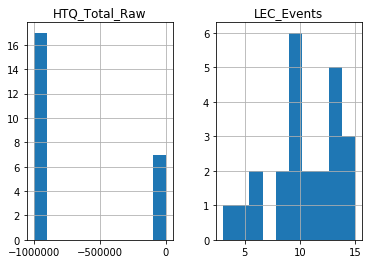

In [866]:
adptsd.hist();

---------------------

<font color='red' size=10>
    <b>adsc_DB.csv</b>
</font>

<br><br>
<font size=4 style="background-color:sandybrown;">
    <b>UPDATE (Dec 4, mtg w/ Dani)</b>:  Dani agrees:  do not use twins in analysis, for
    several reasons.  For example, at best, it generates 99%-100% repeated rows of data.  Worse,
    the sensor data for twins is terrible, so we have repeated rows of crappy data.
</font>


There are many vars in this table, but in SharePoint file 
`mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` 
tab 1 ("Demographic Variables"), Dani
only greenlights two for further inspection:
* GENDER2
* TWIN2

These same 2 vars are greenlit in tab2 as well.

Vars that Dani did not include, but which could be EXCELLENT target vars:
* DLVRYGA_DYS (essentially Udi's target)
* Preterm2
* DLVRYBefore34Wks
* DLVRYBefore28wks



### FINAL Code...
-------------------
```python
# Drop twins... No point in keeping them right now (doubling up data points)
adsc_cols = ['patid', 'gender2','twin2',
    'DLVRYGA_DYS', 'Preterm2', 'DLVRYBefore34Wks', 'DLVRYBefore28wks']
adsc = pd.read_csv('../data/raw/adsc_DB.csv', usecols=adsc_cols)
adsc.drop(adsc.index[adsc.twin2 > 0], inplace=True)
adsc.columns = map(str.lower, adsc.columns)
adsc.drop('twin2', axis=1, inplace=True)
```
---------------------

In [951]:
adsc = pd.read_csv('../data/raw/adsc_DB.csv')#, usecols=['GENDER2','TWIN2'])

In [953]:
adsc.columns adsc.dlvryga_dys

Index(['patid', 'Site', 'M_Delivery_Maternal', 'M_1_Month_Maternal',
       'M_12_Month_Maternal', 'M_Newborn_1', 'M_Newborn_2', 'WDRW_CYCLE',
       'ownertypeID', 'twin2', 'VagSpDel2', 'VagOPDel2', 'Cesarean2',
       'DLVRY_DT', 'DLVRYGA_DYS', 'DLVRYGA_WKS', 'Preterm2',
       'DLVRYBefore34Wks', 'DLVRYBefore28wks', 'TDY_INFTAGE', 'TDY_INFTADJAGE',
       'INFRACENIH7', 'INFRACENIH4', 'INFRACEAI7', 'INFRACEAI4', 'EDC',
       'DELIVERY2', 'OUTCOME2', 'DEMISE_DT', 'DEMISE_GA', 'DEMISE_INFAGE',
       'MISCAR2', 'SB2', 'LB2', 'INFDEMISE2', 'INFDEMISEAFT1YR2',
       'Pregterm20wks2', 'MISCARadj2', 'MiscarRetainedAdj2', 'SBAdj2',
       'SBRetainedMiscarAdj2', 'FetalPrimaryCODBoyd5',
       'FetalAllPrimaryCODBoyd5', 'FetalAllPrimaryCODBoyd8',
       'FetalPrimaryCODBoydSub11', 'FetalCODBoydNoInfo2',
       'FetalPrimaryCODGard9', 'COD9', 'DLVRYGA_DYS_SBadj', 'DEMISE_GAadj5',
       'DLVRYGA_DYS_SBadj5', 'AprAtpsyCons2', 'AtpsyCons2', 'AtpsyCompl2',
       'AtpsyEntered2', 'STATUS4', '

In [537]:
[item for item in adsc.columns if 'gender' in item.lower() or 'twin' in item.lower()]

['twin2', 'gender2']

In [544]:
adsc = pd.read_csv('../data/raw/adsc_DB.csv', usecols=['patid', 'gender2','twin2'])

In [545]:
adsc.head()

,patid,twin2,gender2
0,S002-BISH-00001,0.0,2.0
1,S002-BISH-00002,0.0,1.0
2,S002-BISH-00003,0.0,1.0
3,S002-BISH-00004,0.0,2.0
4,S002-BISH-00005,0.0,1.0


In [546]:
adsc.tail()

,patid,twin2,gender2
6969,S002-BISH-07058,0.0,2.0
6970,S002-BISH-07059,0.0,1.0
6971,S002-BISH-07060,0.0,2.0
6972,S002-BISH-07061,0.0,1.0
6973,S002-BISH-07062,0.0,1.0


In [547]:
adsc.describe()[3:]

,twin2,gender2
min,0.0,-999999.0
25%,0.0,1.0
50%,0.0,1.0
75%,0.0,2.0
max,1.0,2.0


In [548]:
adsc.isnull().sum().sum()

0

In [549]:
adsc.dtypes

patid       object
twin2      float64
gender2    float64
dtype: object

<font size=4 style="background-color:salmon;">
    Crap!  This is a file where there are repeated PATIDs...which will mess up
    the table joins in the next Jupyter Notebook...
</font>

In [861]:
print('N Records:', adsc.shape[0])
print('N Unique PATIDs:', adsc.patid.unique().shape[0])

N Records: 6974
N Unique PATIDs: 6924


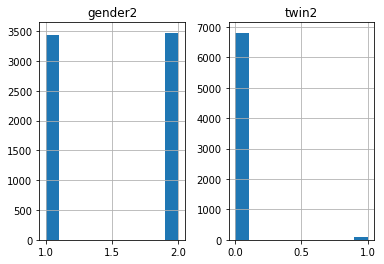

In [863]:
adsc.replace(-999999,np.nan).dropna().hist();

In [877]:
# Drop Twins
adsc_no_twins = adsc.drop(adsc.index[adsc.twin2 > 0])
adsc_no_twins.head()

,patid,twin2,gender2
0,S002-BISH-00001,0.0,2.0
1,S002-BISH-00002,0.0,1.0
2,S002-BISH-00003,0.0,1.0
3,S002-BISH-00004,0.0,2.0
4,S002-BISH-00005,0.0,1.0


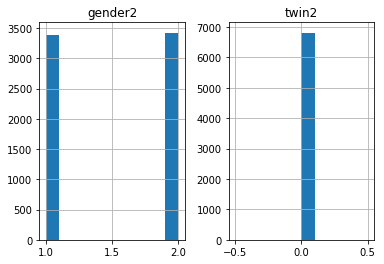

In [878]:
adsc_no_twins.replace(-999999,np.nan).dropna().hist();

In [881]:
adsc = pd.read_csv('../data/raw/adsc_DB.csv', usecols=['patid', 'gender2','twin2'])
adsc.drop(adsc.index[adsc.twin2 > 0], inplace=True)
adsc.drop('twin2', axis=1, inplace=True)

---------------

<font color='red' size=10>
    <b>adscmat_DB.csv</b>
</font>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani greenlights the following vars for
further inspection:
* LaborType_SpontaneousOrAugmented_DB
* EDUC_COMBOHS4
* EMPL
* EMPL_COMB4
* Fertility2
* GrossIncome7
* NULLIPAROUS2
* PARITY
* PreCareFirstGA
* PreCareT1_2
* ToiletWater2

In Tab2 ("Demographic Variables Kept"), we do not have `LaborType_SpontaneousOrAugmented_DB`, but we do
have 3 in its place:
* AugmentedLabor2
* CesareanNoLabor2
* InducedLabor2

<font size=4 style="background-color:sandybrown;">
    <b>UPDATE (Dec 4, mtg w/ Dani)</b>:  Dani is going to include the target vars in her V3
    Excel file.  This file will have the final say on what vars to include.  Updates will
    be documented in the companion notebook to this JNB (02b__2019-Dec-04__...).  Also, the
    new file will have better cleaned data, so I likely will not have to fix the 
    missing values, etc.
</font>


<br><br>
<font style="background-color:yellow;" size=4>
    <b>WARNING</b>: Null values in this values are strings set to `"-99999900.0"`
    instead of ints set to `-999999`
</font>


### FINAL Code...

--------------------
```python
adscmat_cols = [ 'patid',
    'AugmentedLabor2', 'CesareanNoLabor2', 'InducedLabor2',
    'EDUC_COMBOHS4', 'EMPL', 'EMPL_COMB4', 'Fertility2',
    'GrossIncome7', 'Nulliparous2', 'PARITY', 'PreCareFirstGA',
    'PreCareT1_2', 'ToiletWater2',
]

adscmat = pd.read_csv('../data/raw/adscmat_DB.csv', usecols=adscmat_cols)

fix = list(set(adscmat_cols).difference(['patid']))
adscmat[fix] = adscmat[fix].applymap(lambda x: x.split('.')[0]).astype(int).\
                  applymap(lambda x: int(x/100) if x < 0 else x)

adscmat.columns = map(str.lower, adscmat.columns)
```
------------------

In [796]:
adscmat_cols = [ 'patid',
    'AugmentedLabor2', 'CesareanNoLabor2', 'InducedLabor2',
    'EDUC_COMBOHS4', 'EMPL', 'EMPL_COMB4', 'Fertility2',
    'GrossIncome7', 'NULLIPAROUS2', 'PARITY', 'PreCareFirstGA',
    'PreCareT1_2', 'ToiletWater2',
]

adscmat = pd.read_csv('../data/raw/adscmat_DB.csv')#, usecols=adscmat_cols)

In [797]:
[item for item in adscmat.columns if 'null' in item.lower()]

['Nulliparous2']

In [885]:
adscmat_cols = [ 'patid',
    'AugmentedLabor2', 'CesareanNoLabor2', 'InducedLabor2',
    'EDUC_COMBOHS4', 'EMPL', 'EMPL_COMB4', 'Fertility2',
    'GrossIncome7', 'Nulliparous2', 'PARITY', 'PreCareFirstGA',
    'PreCareT1_2', 'ToiletWater2',
]
adscmat = pd.read_csv('../data/raw/adscmat_DB.csv', usecols=adscmat_cols)

In [799]:
adscmat.shape

(6924, 14)

In [800]:
adscmat.head()

,patid,PreCareT1_2,PreCareFirstGA,ToiletWater2,EDUC_COMBOHS4,EMPL,EMPL_COMB4,Fertility2,GrossIncome7,PARITY,Nulliparous2,AugmentedLabor2,InducedLabor2,CesareanNoLabor2
0,S002-BISH-00001,1,49,1,0,-99999900.00%,-99999900.00%,0,-99999900.00%,1,0,0,0,0
1,S002-BISH-00002,0,146,4,-99999900.00%,-99999900.00%,-99999900.00%,0,750,1,0,0,0,0
2,S002-BISH-00003,0,142,4,0,-99999900.00%,2,0,-99999900.00%,0,1,0,0,0
3,S002-BISH-00004,0,156,4,0,-99999900.00%,2,0,3500,1,0,0,0,0
4,S002-BISH-00005,0,167,4,-99999900.00%,-99999900.00%,0,0,1500,1,0,0,0,0


In [801]:
adscmat.EMPL.dtype

dtype('O')

In [802]:
adscmat.EMPL.head(15)

0     -99999900.00%
1     -99999900.00%
2     -99999900.00%
3     -99999900.00%
4     -99999900.00%
5     -99999900.00%
6     -99999900.00%
7     -99999900.00%
8             40.00
9     -99999900.00%
10            24.00
11            45.00
12    -99999900.00%
13    -99999900.00%
14            40.00
Name: EMPL, dtype: object

In [594]:
np.unique(list(adscmat.EMPL.map(lambda x: x.split('.')[0]).to_dict().values()))

array(['-99999900', '0', '1', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '2', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '6', '60', '61', '62', '63', '64', '65', '66', '69', '70',
       '72', '76', '8', '82', '86', '88', '9'], dtype='<U9')

In [600]:
adscmat.EMPL.map(lambda x: x.split('.')[0]).astype(float).map(lambda x: x/100 if x < 0 else x).head(15)

0    -999999.0
1    -999999.0
2    -999999.0
3    -999999.0
4    -999999.0
5    -999999.0
6    -999999.0
7    -999999.0
8         40.0
9    -999999.0
10        24.0
11        45.0
12   -999999.0
13   -999999.0
14        40.0
Name: EMPL, dtype: float64

<font style="background-color:lightyellow;">
    The above error correction needs to be done for:
<ul style="background-color:lightyellow;">
    <li>EMPL</li>
    <li>EDUC_COMBOHS4</li>
    <li>EMPL_COMB4</li>
    <li>GrossIncome7</li>
</font>

In [602]:
print('EDUC_COMBOHS4:',np.unique(list(adscmat.EDUC_COMBOHS4.map(lambda x: x.split('.')[0]).to_dict().values())))
print('EMPL_COMB4:',np.unique(list(adscmat.EMPL_COMB4.map(lambda x: x.split('.')[0]).to_dict().values())))
print('GrossIncome7:',np.unique(list(adscmat.GrossIncome7.map(lambda x: x.split('.')[0]).to_dict().values())))

EDUC_COMBOHS4: ['-99999900' '0' '1' '2' '3']
EMPL_COMB4: ['-99999900' '0' '1' '2' '3']
GrossIncome7: ['-99999900' '1500' '250' '2500' '3500' '4500' '5000' '750']


Wow... I really overkilled it w/ all those lambda mappings!!

<font style="background-color:yellow;">
    <b>ALSO</b>, note from the future:  I found out way later on that this
    correction needed to occur for all of the columns.
</font>

In [889]:
for col in adscmat.columns:
    print( col+'\t\t', '-99999900.00%' in adscmat[col].unique() )

patid		 False
PreCareT1_2		 True
PreCareFirstGA		 True
ToiletWater2		 True
EDUC_COMBOHS4		 True
EMPL		 True
EMPL_COMB4		 True
Fertility2		 True
GrossIncome7		 True
PARITY		 True
Nulliparous2		 True
AugmentedLabor2		 True
InducedLabor2		 True
CesareanNoLabor2		 True


In [884]:
adscmat.AugmentedLabor2.unique()

array(['0', '-99999900.00%', '1'], dtype=object)

In [608]:
adscmat[['EDUC_COMBOHS4','EMPL','EMPL_COMB4','GrossIncome7']].head(7)

,EDUC_COMBOHS4,EMPL,EMPL_COMB4,GrossIncome7
0,0,-99999900.00%,-99999900.00%,-99999900.00%
1,-99999900.00%,-99999900.00%,-99999900.00%,750
2,0,-99999900.00%,2,-99999900.00%
3,0,-99999900.00%,2,3500
4,-99999900.00%,-99999900.00%,0,1500
5,-99999900.00%,-99999900.00%,-99999900.00%,-99999900.00%
6,0,-99999900.00%,0,250


In [611]:
adscmat[['EDUC_COMBOHS4','EMPL','EMPL_COMB4','GrossIncome7']].\
    applymap(lambda x: x.split('.')[0]).astype(int).applymap(lambda x: int(x/100) if x < 0 else x).head(7)

,EDUC_COMBOHS4,EMPL,EMPL_COMB4,GrossIncome7
0,0,-999999,-999999,-999999
1,-999999,-999999,-999999,750
2,0,-999999,2,-999999
3,0,-999999,2,3500
4,-999999,-999999,0,1500
5,-999999,-999999,-999999,-999999
6,0,-999999,0,250


In [948]:
adscmat_cols = [ 'patid',
    'AugmentedLabor2', 'CesareanNoLabor2', 'InducedLabor2',
    'EDUC_COMBOHS4', 'EMPL', 'EMPL_COMB4', 'Fertility2',
    'GrossIncome7', 'Nulliparous2', 'PARITY', 'PreCareFirstGA',
    'PreCareT1_2', 'ToiletWater2',
]

adscmat = pd.read_csv('../data/raw/adscmat_DB.csv', usecols=adscmat_cols)

# OLD CODE -- originally thought problem was isolated to 4 vars
#adscmat[['EDUC_COMBOHS4','EMPL','EMPL_COMB4','GrossIncome7']] = \
#    adscmat[['EDUC_COMBOHS4','EMPL','EMPL_COMB4','GrossIncome7']].\
#    applymap(lambda x: x.split('.')[0]).astype(int).applymap(lambda x: int(x/100) if x < 0 else x)
fix = list(set(adscmat_cols).difference(['patid']))
adscmat[fix] = adscmat[fix].applymap(lambda x: x.split('.')[0]).astype(int).\
                  applymap(lambda x: int(x/100) if x < 0 else x)

In [930]:
adscmat.head()

,patid,PreCareT1_2,PreCareFirstGA,ToiletWater2,EDUC_COMBOHS4,EMPL,EMPL_COMB4,Fertility2,GrossIncome7,PARITY,Nulliparous2,AugmentedLabor2,InducedLabor2,CesareanNoLabor2
0,S002-BISH-00001,1,49,1,0,-999999,-999999,0,-999999,1,0,0,0,0
1,S002-BISH-00002,0,146,4,-999999,-999999,-999999,0,750,1,0,0,0,0
2,S002-BISH-00003,0,142,4,0,-999999,2,0,-999999,0,1,0,0,0
3,S002-BISH-00004,0,156,4,0,-999999,2,0,3500,1,0,0,0,0
4,S002-BISH-00005,0,167,4,-999999,-999999,0,0,1500,1,0,0,0,0


In [931]:
adscmat.isnull().sum().sum() 

0

In [932]:
adscmat.isnull().sum()

patid               0
PreCareT1_2         0
PreCareFirstGA      0
ToiletWater2        0
EDUC_COMBOHS4       0
EMPL                0
EMPL_COMB4          0
Fertility2          0
GrossIncome7        0
PARITY              0
Nulliparous2        0
AugmentedLabor2     0
InducedLabor2       0
CesareanNoLabor2    0
dtype: int64

In [950]:
a

[1, 2, 3, 4]

In [933]:
adscmat.PreCareFirstGA.dtype

dtype('int64')

In [934]:
adscmat.describe()[3:]

,PreCareT1_2,PreCareFirstGA,ToiletWater2,EDUC_COMBOHS4,EMPL,EMPL_COMB4,Fertility2,GrossIncome7,PARITY,Nulliparous2,AugmentedLabor2,InducedLabor2,CesareanNoLabor2
min,-999999.0,-999999.0,-999999.0,-999999.0,-999999.00,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
25%,0.0,70.0,2.0,0.0,-999999.00,0.0,0.0,-999999.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,107.0,4.0,0.0,-999999.00,2.0,0.0,2500.0,1.0,0.0,0.0,0.0,0.0
75%,1.0,146.0,4.0,1.0,26.25,2.0,0.0,4500.0,2.0,1.0,0.0,0.0,0.0
max,1.0,300.0,4.0,3.0,88.00,3.0,1.0,5000.0,8.0,1.0,1.0,1.0,1.0


<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [935]:
print('N Records:', adscmat.shape[0])
print('N Unique PATIDs:', adscmat.patid.unique().shape[0])

N Records: 6924
N Unique PATIDs: 6924


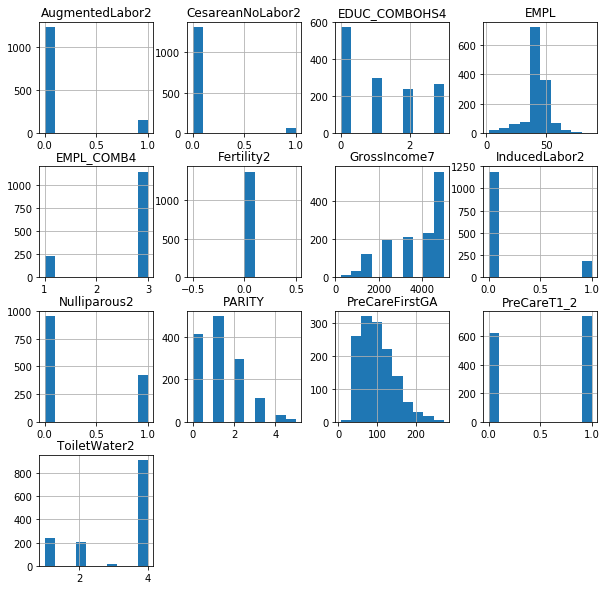

In [938]:
adscmat.replace(-999999,np.nan).dropna().hist(figsize=(10,10));

### Update (Dec 04)
Dani will be fixing this data file...so code will have to change.  

--------------------------

<font color='red' size=10>
    <b>adsmk_patid_DB.csv</b>
</font>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani greenlights the following vars for further inspection:
* AvgNumCigHome

Note that this is just one smoking var among over 60 vars, yet tab2 ("Demographic Variables Kept") 
confirms that this is the sole variable of interest from this table.

### FINAL Code...
---------
```python
adsmk = pd.read_csv('../data/raw/adsmk_patid_DB.csv', 
                    usecols=['patid','AvgNumCigHome'])
adsmk.columns = map(str.lower, adsmk.columns)
```
--------------


In [632]:
adsmk = pd.read_csv('../data/raw/adsmk_patid_DB.csv', usecols=['patid','AvgNumCigHome'])

In [789]:
adsmk.shape

(6924, 2)

In [790]:
adsmk.head()

,patid,avgnumcighome
0,S002-BISH-00001,1.0
1,S002-BISH-00002,1.0
2,S002-BISH-00003,2.5
3,S002-BISH-00004,2.0
4,S002-BISH-00005,2.0


In [791]:
adsmk.tail()

,patid,avgnumcighome
6919,S002-BISH-07058,1.50
6920,S002-BISH-07059,1.00
6921,S002-BISH-07060,1.67
6922,S002-BISH-07061,1.67
6923,S002-BISH-07062,6.00


In [792]:
adsmk.describe()[3:]

,avgnumcighome
min,-999999.0
25%,1.0
50%,1.5
75%,2.5
max,18.0


In [793]:
adsmk.isnull().sum()

patid            0
avgnumcighome    0
dtype: int64

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [788]:
print('N Records:', adsmk.shape[0])
print('N Unique PATIDs:', adsmk.patid.unique().shape[0])

N Records: 6924
N Unique PATIDs: 6924


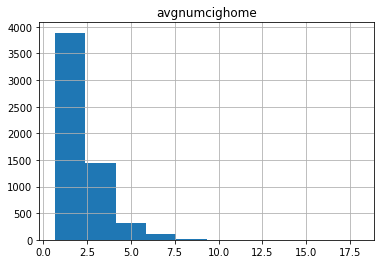

In [787]:
# Final Code
adsmk = pd.read_csv('../data/raw/adsmk_patid_DB.csv', usecols=['patid','AvgNumCigHome'])
adsmk.columns = map(str.lower, adsmk.columns)
# Viz
adsmk.query('avgnumcighome >= 0').hist();

---------------------------------------

<font color='red' size=10>
    <b>adstai_DB.csv</b>
</font>

<br><br>
<font size=4 style="background-color:sandybrown;">
    <b>UPDATE (Dec 4, mtg w/ Dani)</b>:  Here we have <font style="font-family:'Courier New';font-weight:bold;">MAT_AGE</font>
    (maternal age), while in the ADSTAI table we have another age variable that records the mother's
    age when she completed the anxiety test/questionnaire.  I suspected these two vars were completely
    redundant, even if off by up to a year (e.g., mother enrolls in study at 37, has birthday a month
    later, then takes anxiety test a month after that at 38).  Dani agreed; there was no special
    reason to keep both; just an oversight.  From below analysis:
</font>
    <ul style="background-color:sandybrown;">
        <li> STAI_AGE is fractional (e.g., 24.15), while mat_age is integer (e.g., 24) </li>
        <li> for 75% of the data, STAI_AGE - mat_age &lt;= 0.18 (65 days, or 2 months difference) </li>
        <li>if you round STAI_AGE, only 5 records (from over 6000) have different integer ages, likely
            due to a mother's bday passing in between time at enrollment and time at anxiety measurement </li>
    </ul>
<font size=4 style="background-color:sandybrown;">
    <b>ACTION</b>: toss STAI_AGE to the weeds!
</font>


In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani greenlights the following vars for further inspection:
* **S_ANXIETY** - STAI Raw State Score
* **STAI_AGE** - Participant Age at the Time of the Spielberger State Trait Anxiety Scale Interview
* **T_ANXIETY** - STAI Raw Trait Score

These same variable are greenlit in tab2 as well ("Demographic Variables Kept")

Note that in the CSV file, these vars are not all capitalized, but instead appear as:
* S_Anxiety
* T_Anxiety
* STAI_AGE (all capitals)

<br>
<font style="background-color:yellow;">
    <b>NOTE</b>: We already have an age variable: MAT_AGE from adelig_DB.csv. Is
    this just redundant?
</font>



### FINAL Code...
----------------
```python
adstai = pd.read_csv('../data/raw/adstai_DB.csv', 
                     usecols=['patid','S_Anxiety','STAI_AGE','T_Anxiety'])
adstai.columns = map(str.lower, adstai.columns)
```
--------

In [777]:
adstai = pd.read_csv('../data/raw/adstai_DB.csv', usecols=['patid','S_Anxiety','STAI_AGE','T_Anxiety'])

In [650]:
adstai.columns

Index(['S_Anxiety', 'T_Anxiety', 'STAI_AGE'], dtype='object')

In [651]:
adstai.head()

,S_Anxiety,T_Anxiety,STAI_AGE
0,23.0,32.0,24.15
1,58.0,63.0,26.01
2,30.0,52.0,17.02
3,31.0,37.0,24.01
4,26.0,43.0,22.19


In [652]:
adstai.tail()

,S_Anxiety,T_Anxiety,STAI_AGE
6574,57.0,51.0,24.08
6575,34.0,26.0,19.10
6576,33.0,45.0,26.10
6577,23.0,23.0,24.17
6578,44.0,62.0,17.11


In [653]:
adstai.describe()[3:]

,S_Anxiety,T_Anxiety,STAI_AGE
min,-999999.0,-999999.0,15.190
25%,23.0,33.0,20.155
50%,28.0,40.0,24.100
75%,36.0,49.0,29.020
max,79.0,79.0,45.070


In [654]:
adstai.isnull().sum()

S_Anxiety    0
T_Anxiety    0
STAI_AGE     0
dtype: int64

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [778]:
print('N Records:', adstai.shape[0])
print('N Unique PATIDs:', adstai.patid.unique().shape[0])

N Records: 6579
N Unique PATIDs: 6579


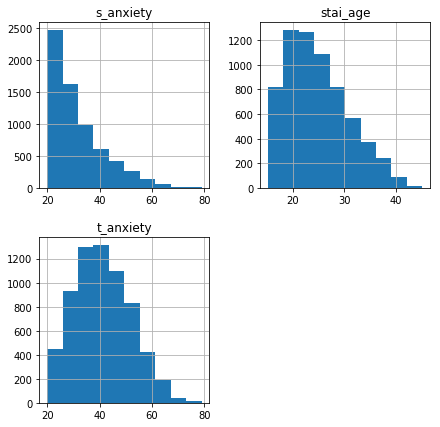

In [776]:
# Final Code
adstai = pd.read_csv('../data/raw/adstai_DB.csv', usecols=['patid','S_Anxiety','STAI_AGE','T_Anxiety'])
adstai.columns = map(str.lower, adstai.columns)
# Viz
adstai.replace(-999999,np.nan).dropna().hist(figsize=(7,7));

### Update (Dec 4, mtg w/ Dani)

<font style="background-color:sandybrown;">
Dani agrees that the age var is redundant.  Below, I show in full detail just how
redundant it is
</font>

* STAI_AGE is fractional (e.g., 24.15), while mat_age is integer (e.g., 24)
* for 75% of the data, STAI_AGE - mat_age <= 0.18 (65 days, or ~2 months difference)
* if you round STAI_AGE, only 5 records (from over 6000) have different integer ages, likely
  due to a mother's bday passing in between time at enrollment and time at anxiety measurement
  
Point is, toss STAI_AGE to the weeds!

In [1000]:
ages = adstai.set_index('patid')[['STAI_AGE']].join(adelig.set_index('patid')[['mat_age']], how='outer')
ages.head(7)

,STAI_AGE,mat_age
patid,,
S002-BISH-00001,24.15,24.0
S002-BISH-00002,26.01,26.0
S002-BISH-00003,17.02,17.0
S002-BISH-00004,24.01,24.0
S002-BISH-00005,22.19,22.0
S002-BISH-00006,NaN,33.0
S002-BISH-00007,25.11,25.0


In [1002]:
(ages.STAI_AGE - ages.mat_age).describe()[3:]

min    0.00
25%    0.06
50%    0.12
75%    0.18
max    1.06
dtype: float64

In [992]:
ages = ages.dropna().applymap(lambda x: round(x))
ages.head(7)

,STAI_AGE,mat_age
patid,,
S002-BISH-00001,24,24
S002-BISH-00002,26,26
S002-BISH-00003,17,17
S002-BISH-00004,24,24
S002-BISH-00005,22,22
S002-BISH-00007,25,25
S002-BISH-00008,19,19


In [993]:
ages.query('STAI_AGE != mat_age')

,STAI_AGE,mat_age
patid,,
S002-BISH-00549,29,28
S002-BISH-00683,27,26
S002-BISH-02398,20,19
S002-BISH-04280,20,19
S002-BISH-04320,38,37


------------------------------

<font color='red' size=10>
    <b>advs_DB.csv</b>
</font>

In SharePoint file `mbh001/DemoMetaClinical_DataDictionary/DataDictionary/mbh001_Dictionary-of-Variable-terms_20181119_V2.xlsx` tab 1 ("Demographic Variables"), Dani greenlights the following vars for further inspection:
* **ARMCIRMM** - Arm Circumference at Recruitment (mm)
* **BMIRI** - BMI at Recruitment
* **HEIGHT** - Maternal Height (inches)
* **PrePregBMI** - Pre-Pregnancy BMI
* **PREPREGWEIGHT** - Pre-Pregnancy Weight (pounds)

These same vars are the only ones listed in tab2 as well ("Demographic Variables Kept").

One **note**, however: in the CSV file:
* PrePregBMI --> PREPREGBMI


### FINAL Code...
------------
```python
advs = pd.read_csv('../data/raw/advs_DB.csv', 
                   usecols=['patid','ARMCIRMM','BMIRI','HEIGHT','PREPREGBMI','PREPREGWEIGHT'])
advs.columns = map(str.lower, advs.columns)
```
---------

In [ ]:
advs = pd.read_csv('../data/raw/advs_DB.csv', 
                   usecols=['patid','ARMCIRMM','BMIRI','HEIGHT','PREPREGBMI','PREPREGWEIGHT'])

In [664]:
advs.columns

Index(['HEIGHT', 'BMIRI', 'PREPREGWEIGHT', 'PREPREGBMI', 'ARMCIRMM'], dtype='object')

In [666]:
advs.head()

,HEIGHT,BMIRI,PREPREGWEIGHT,PREPREGBMI,ARMCIRMM
0,64.00,21.57,121.25,20.81,245.67
1,64.61,21.57,110.23,18.57,255.33
2,62.61,20.87,-999999.00,-999999.00,228.00
3,61.94,37.30,191.80,35.14,379.00
4,65.38,22.12,-999999.00,-999999.00,263.50


In [667]:
advs.tail()

,HEIGHT,BMIRI,PREPREGWEIGHT,PREPREGBMI,ARMCIRMM
6919,62.22,18.97,77.16,14.01,233.5
6920,61.73,22.41,-999999.00,-999999.00,222.0
6921,64.07,21.03,-999999.00,-999999.00,250.0
6922,65.61,22.72,134.48,21.96,260.0
6923,59.61,20.02,-999999.00,-999999.00,220.0


In [668]:
advs.describe()[3:]

,HEIGHT,BMIRI,PREPREGWEIGHT,PREPREGBMI,ARMCIRMM
min,-999999.00,-999999.00,-999999.00,-999999.00,-999999.000
25%,60.75,21.09,-999999.00,-999999.00,240.000
50%,62.42,24.02,-999999.00,-999999.00,265.500
75%,64.11,28.62,121.25,21.97,300.625
max,72.24,55.88,299.83,53.12,535.000


In [669]:
advs.isnull().sum()

HEIGHT           0
BMIRI            0
PREPREGWEIGHT    0
PREPREGBMI       0
ARMCIRMM         0
dtype: int64

<font size=4 style="background-color:lightgreen;">
    Good! No duplicated PATIDs.
</font>

In [775]:
print('N Records:', advs.shape[0])
print('N Unique PATIDs:', advs.patid.unique().shape[0])

N Records: 6924
N Unique PATIDs: 6924


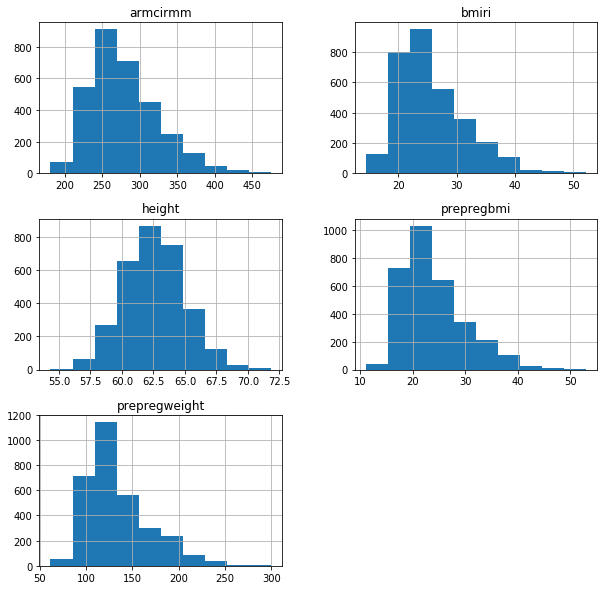

In [769]:
# Final Code
advs = pd.read_csv('../data/raw/advs_DB.csv', 
                   usecols=['patid','ARMCIRMM','BMIRI','HEIGHT','PREPREGBMI','PREPREGWEIGHT'])
advs.columns = map(str.lower, advs.columns)
# Viz
advs.replace(-999999,np.nan).dropna().hist(figsize=(10,10));

# Join all the Demo/Clinical Tables
**Dec 3, 2019**

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
data = dict()

# MENTAL
#  -- NOTE: May have to drop all these vars (they are nearly constant)
mental_cols = ['patid','aantipsych2','antianx2','anticonv2','antidepress2','cantipsych2',
           'moodstab2','ssri2','stim2',]
mental = pd.read_csv('../data/raw/Derived Variables of Interest Participants Only.mental_ill_DB.csv',
    usecols = mental_cols)
mental.fillna(-999999, inplace=True)
mental.set_index('patid', inplace=True)
data['mental'] = mental


# ADAFPPAPPA
adafppappa = pd.read_csv('../data/raw/adafppappa_DB.csv', usecols = ['PATID','AFPMoM'])
adafppappa.columns = map(str.lower, adafppappa.columns)
# Correct the Missing Value representation (-9999.99 --> -999999)
adafppappa.afpmom = adafppappa.afpmom.map(lambda x: -999999 if x == -9999.99 else x)
adafppappa.set_index('patid', inplace=True)
data['adafppappa'] = adafppappa


# ADALC 
#  -- Do we want to keep the Bing7T* vars?
#  -- Do we want to also include MoreThan1YrPrior2? (Not currently in CSV file.)
adalc = pd.read_csv('../data/raw/adalc_patid_DB.csv', usecols=range(0,12))
adalc.columns = map(str.lower, adalc.columns)
adalc.set_index('patid', inplace=True)
data['adalc'] = adalc


# ADCDRISC
adcdrisc = pd.read_csv('../data/raw/adcdrisc_DB.csv', usecols=['patid','CDRISC_Raw'], 
                       na_values='#NULL!')
adcdrisc.columns = map(str.lower, adcdrisc.columns)
adcdrisc.fillna(-999999, inplace=True)
adcdrisc.set_index('patid', inplace=True)
data['adcdrisc'] = adcdrisc


# ADDRG 
# It is essentially necessary to drop: 
#     hair1yrprior6 (0 nznn), hairlmp2 (0 nznn), hairt12 (0), hairt22 (2)
# It is likely necessary to drop: 
#     otherlmp2 (2 nznn instances)
# It might be worth dropping:
#     othert12 (14 nznn), othert22 (16), other1yrprior2 (20), methlmp2 (54)
# NOTE: nznn := nonzero/nonNull values
addrg_cols = [ 'patid',
    'Hair1YrPrior6', 'HairLMP2', 'HairT12', 'HairT22',
    'Hookah1YrPrior6', 'HookahLMP2', 'HookahT12', 'HookahT22',
    'Meth1YrPrior6', 'MethLMP2', 'MethT12', 'MethT22',
    'MJ1YrPrior6', 'MJLMP2', 'MJT12', 'MJT22',
    'Other1YrPrior2', 'OtherLMP2', 'OtherT12', 'OtherT22',
]
addrg_drop_cols = ['hair1yrprior6','hairlmp2','hairt12','hairt22','otherlmp2',
                              'othert12','othert22','other1yrprior2','methlmp2']
addrg_drop=False
if addrg_drop:
    addrg_cols = [item for item in addrg_cols if item not in addrg_drop_cols]
addrg = pd.read_csv('../data/raw/addrg_patid_DB.csv', usecols = addrg_cols)
addrg.columns = map(str.lower, addrg.columns)
addrg.set_index('patid', inplace=True)
data['addrg'] = addrg


# ADEDIN (merged edit bish)
#  -- Do we want to keep the Endinburgh CycleID? (Bill recommneds not to, while
#     Dani thinks it can serve as a source of interaction information, e.g., within
#     a RF)
adedin_merged_edit_bish = pd.read_csv('../data/raw/adedin_merged_edit_bish_DB.csv')
adedin_merged_edit_bish.columns = ['patid', 'edinburgh', 'edinburgh_cycle_id']
adedin_merged_edit_bish.fillna(-999999, inplace=True)
adedin_merged_edit_bish.set_index('patid', inplace=True)
data['adedin'] = adedin_merged_edit_bish


# ADELIG
#  -- Do We want to keep the `hispanic2` var? (It is essentially CONSTANT --  either zero 
#     or missing.)
adelig = pd.read_csv('../data/raw/adelig_DB.csv', 
                     usecols = ['patid', 'Hispanic2', 'MAT_AGE'])
adelig.columns = map(str.lower, adelig.columns)
adelig.set_index('patid', inplace=True)
data['adelig'] = adelig


# ADFETALGROWTH
adfetalgrowth = pd.read_csv('../data/raw/adfetalgrowth_BISHCORRECTED_01.24.19_persex_DB.csv',
                           usecols = range(0,3))
adfetalgrowth.columns = ['patid', 'sex', 'growth_deviation_index']
adfetalgrowth.set_index('patid', inplace=True)
data['adfetalgrowth'] = adfetalgrowth


# ADMH
#  -- NOTE:  Each of the var listed below have less than 50 nonZero/nonNull instances (out of nearly 7k records):
#       'hxsuid2', 'hxsids2', 'hxsidssuid2', 'hx_baby_cleft2', 'hx_baby_down2',
#       'hx_baby_fas2', 'hx_baby_pfas2', 'hx_baby_heart2',
#       'hx_baby_hypoxiaencep2', 'hx_baby_iugrsga2', 'hx_baby_retard2',
#       'hx_baby_neuraltube2', 'hx_baby_poorweight2', 'hx_baby_shoulder2',
#       'sicklecellanemiaprior2', 'apsprior2', 'anxietyprior2',
#       'bloodclotprior2', 'cancerprior2', 'connectivetissuedisorderprior2',
#       'gdmprior2', 'gdmpriorfp2', 'hyperthyroidprior2', 'hypothyroidprior2',
#       'lupusprior2', 'abruptionprior2', 'abruptionpriorfp2',
#       'placentapreviaprior2', 'placentapreviapriorfp2', 'ppromprior2',
#       'pprompriorfp2', 'raprior2', 'thromboembolicdiseaseprior2'
#  -- most of the vars have less than 10% (~700) nznn values
drop_vars = ['patid.1', 'AnemiaPriorFP2', 'ANEMIAacute2', 'ANEMIAchronic2', 'AnemiaPrior2']
admh = pd.read_csv('../data/raw/admh_DB.csv')
admh.drop(drop_vars, axis=1, inplace=True)
admh.columns = map(str.lower, admh.columns)
admh.set_index('patid', inplace=True)
data['admh'] = admh


# ADPTSD
#  -- MY REC:  DO NOT USE THIS STUFF AT ALL (here just in case we decide to)
adptsd = pd.read_csv('../data/raw/adptsd_DB.csv', usecols = ['patid', 'HTQ_Total_Raw', 'LEC_Events'])
bish_index = adptsd.patid.str.split('-').map(lambda x: x[1]) == 'BISH'
adptsd = adptsd[bish_index].reset_index(drop=True).dropna()
adptsd.set_index('patid', inplace=True)
data['adptsd'] = adptsd


# ADSC
#  -- THIS HAS 50 DUPLICATED PATIDs due to twins...
#  -- Udi dropped these...and for the time being, I suggest we do the same, since
#     it basically serves as doubling up data points (there is no twin-tuned sensor
#     data for example;  the only var that might change is gender).
#  -- NOTE: I added a few potential target vars that Dani didn't include in
#     her greenlit vars, namely: 'DLVRYGA_DYS', 'Preterm2', 'DLVRYBefore34Wks', 
#     and 'DLVRYBefore28wks'
adsc_cols = ['patid', 'gender2','twin2',
    'DLVRYGA_DYS', 'Preterm2', 'DLVRYBefore34Wks', 'DLVRYBefore28wks']
adsc = pd.read_csv('../data/raw/adsc_DB.csv', usecols=adsc_cols)
adsc.drop(adsc.index[adsc.twin2 > 0], inplace=True)
adsc.columns = map(str.lower, adsc.columns)
adsc.drop('twin2', axis=1, inplace=True)
adsc.set_index('patid', inplace=True)
data['adsc'] = adsc


# ADSCMAT
adscmat_cols = [ 'patid',
    'AugmentedLabor2', 'CesareanNoLabor2', 'InducedLabor2',
    'EDUC_COMBOHS4', 'EMPL', 'EMPL_COMB4', 'Fertility2',
    'GrossIncome7', 'Nulliparous2', 'PARITY', 'PreCareFirstGA',
    'PreCareT1_2', 'ToiletWater2',
]
adscmat = pd.read_csv('../data/raw/adscmat_DB.csv', usecols=adscmat_cols)
fix = list(set(adscmat_cols).difference(['patid']))
adscmat[fix] = adscmat[fix].applymap(lambda x: x.split('.')[0]).astype(int).\
                  applymap(lambda x: int(x/100) if x < 0 else x)
adscmat.columns = map(str.lower, adscmat.columns)
adscmat.set_index('patid', inplace=True)
data['adscmat'] = adscmat


# ADSMK
adsmk = pd.read_csv('../data/raw/adsmk_patid_DB.csv', 
                    usecols=['patid','AvgNumCigHome'])
adsmk.columns = map(str.lower, adsmk.columns)
adsmk.set_index('patid', inplace=True)
data['adsmk'] = adsmk


# ADSTAI
#  -- Do we want to keep STAI_AGE (mother's age at time of test)?  We already have
#     an age variable (MAT_AGE from adelig_DB.csv).  Assuming this test is administered
#     within several months of when MAG_AGE was recorded, it would be fairly redundant
#     info (even up to a year in separation, if you ask me).
adstai = pd.read_csv('../data/raw/adstai_DB.csv', 
                     usecols=['patid','S_Anxiety','STAI_AGE','T_Anxiety'])
adstai.columns = map(str.lower, adstai.columns)
adstai.set_index('patid', inplace=True)
data['adstai'] = adstai


# ADVS
advs = pd.read_csv('../data/raw/advs_DB.csv', 
                   usecols=['patid','ARMCIRMM','BMIRI','HEIGHT','PREPREGBMI','PREPREGWEIGHT'])
advs.columns = map(str.lower, advs.columns)
advs.set_index('patid', inplace=True)
data['advs'] = advs

#--------------------------------------

# Including this here so that all the important code is in one place.
def join_all_tables():
    tbl1 = pd.DataFrame()
    for tbl2 in data.keys():
        tbl1 = tbl1.join(data[tbl2], how='outer')
    return tbl1
      
#--------------------------------------

democlinical = join_all_tables()

#---------------------------------

In [22]:
democlinical.head()

,ssri2,antidepress2,cantipsych2,aantipsych2,moodstab2,stim2,antianx2,anticonv2,afpmom,patid.1,...,cesareannolabor2,avgnumcighome,s_anxiety,t_anxiety,stai_age,height,bmiri,prepregweight,prepregbmi,armcirmm
patid,,,,,,,,,,,,,,,,,,,,,
S002-BISH-00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.00,BISH,...,0.0,1.0,23.0,32.0,24.15,64.00,21.57,121.25,20.81,245.67
S002-BISH-00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.17,BISH,...,0.0,1.0,58.0,63.0,26.01,64.61,21.57,110.23,18.57,255.33
S002-BISH-00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,BISH,...,0.0,2.5,30.0,52.0,17.02,62.61,20.87,-999999.00,-999999.00,228.00
S002-BISH-00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,BISH,...,0.0,2.0,31.0,37.0,24.01,61.94,37.30,191.80,35.14,379.00
S002-BISH-00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,BISH,...,0.0,2.0,26.0,43.0,22.19,65.38,22.12,-999999.00,-999999.00,263.50


In [23]:
data.keys()

dict_keys(['mental', 'adafppappa', 'adalc', 'adcdrisc', 'addrg', 'adedin', 'adelig', 'adfetalgrowth', 'admh', 'adptsd', 'adsc', 'adscmat', 'adsmk', 'adstai', 'advs'])

In [26]:
dc_check = data['mental'].\
    join(data['adafppappa'], how='outer').\
    join(data['adalc'], how='outer').\
    join(data['adcdrisc'], how='outer').\
    join(data['addrg'], how='outer').\
    join(data['adedin'], how='outer').\
    join(data['adelig'], how='outer').\
    join(data['adfetalgrowth'], how='outer').\
    join(data['admh'], how='outer').\
    join(data['adptsd'], how='outer').\
    join(data['adsc'], how='outer').\
    join(data['adscmat'], how='outer').\
    join(data['adsmk'], how='outer').\
    join(data['adstai'], how='outer').\
    join(data['advs'], how='outer')

In [39]:
equality_check = (dc_check == democlinical).sum()
print('Equality should sum to:', len(dc_check))
equality_check.head(10)

Equality should sum to: 6925


ssri2           6923
antidepress2    6923
cantipsych2     6923
aantipsych2     6923
moodstab2       6923
stim2           6923
antianx2        6923
anticonv2       6923
afpmom          1425
patid.1         6924
dtype: int64

In [38]:
# My guess: equality does not sum to 6925 based on nullity
equality_check = (dc_check == democlinical).sum()
nullity_check = (6925 - dc_check.isnull().sum())
nullity_check.head(10)

ssri2           6923
antidepress2    6923
cantipsych2     6923
aantipsych2     6923
moodstab2       6923
stim2           6923
antianx2        6923
anticonv2       6923
afpmom          1425
patid.1         6924
dtype: int64

In [42]:
print('Equality should sum to:', len(equality_check))
print('Test Result:',(equality_check == nullity_check).sum())

print('If condition met, then the two tables are equal.')

Equality should sum to: 132
Test Result: 132
If condition met, then the two tables are equal.


# Some Scratch Paper
**Dec 3, 2009**

Here, I'm just looking at set intesections and set difference of PATIDs, getting
a feel for things.

In [4]:
import pandas as pd

In [43]:
def compare_patid(
    tbl1,
    tbl2,
    num_diff = False,
):
    print(f'{tbl1} Record Count:', data[tbl1].__len__())
    print(f'{tbl2} Record Count:', data[tbl2].__len__())
    print('Intersection:', set(data[tbl1].index).intersection(data[tbl2].index).__len__())
    diff_set = set(data[tbl2].index).difference(data[tbl1].index)
    if num_diff:
        print('tb2\\tbl1:', len(diff_set))
    else:
        print('tb2\\tbl1:', diff_set)

        
def loop_compare_patid(
    tbl1,
    num_diff = False,
    skip = 0,
):
    tbl2_list = list(data.keys())
    tbl2_list.remove(tbl1)
    for tbl2 in tbl2_list:
        if skip:
            skip-=1
        else:
            compare_patid(tbl1, tbl2, num_diff = num_diff)
            print('\n--------------------------------\n')

In [44]:
data.keys()

dict_keys(['mental', 'adafppappa', 'adalc', 'adcdrisc', 'addrg', 'adedin', 'adelig', 'adfetalgrowth', 'admh', 'adptsd', 'adsc', 'adscmat', 'adsmk', 'adstai', 'advs'])

In [45]:
loop_compare_patid('mental')

mental Record Count: 6923
adafppappa Record Count: 1425
Intersection: 1424
tb2\tbl1: {'S002-BISH-01019'}

--------------------------------

mental Record Count: 6923
adalc Record Count: 6924
Intersection: 6923
tb2\tbl1: {'S002-BISH-01998'}

--------------------------------

mental Record Count: 6923
adcdrisc Record Count: 1824
Intersection: 1823
tb2\tbl1: {'S002-BISH-01998'}

--------------------------------

mental Record Count: 6923
addrg Record Count: 6924
Intersection: 6923
tb2\tbl1: {'S002-BISH-01998'}

--------------------------------

mental Record Count: 6923
adedin Record Count: 6588
Intersection: 6587
tb2\tbl1: {'S002-BISH-01998'}

--------------------------------

mental Record Count: 6923
adelig Record Count: 6924
Intersection: 6923
tb2\tbl1: {'S002-BISH-01998'}

--------------------------------

mental Record Count: 6923
adfetalgrowth Record Count: 6649
Intersection: 6648
tb2\tbl1: {'S002-BISH-01998'}

--------------------------------

mental Record Count: 6923
admh Record

In [46]:
loop_compare_patid('adafppappa', num_diff=True, skip=1)

adafppappa Record Count: 1425
adalc Record Count: 6924
Intersection: 1424
tb2\tbl1: 5500

--------------------------------

adafppappa Record Count: 1425
adcdrisc Record Count: 1824
Intersection: 628
tb2\tbl1: 1196

--------------------------------

adafppappa Record Count: 1425
addrg Record Count: 6924
Intersection: 1424
tb2\tbl1: 5500

--------------------------------

adafppappa Record Count: 1425
adedin Record Count: 6588
Intersection: 1417
tb2\tbl1: 5171

--------------------------------

adafppappa Record Count: 1425
adelig Record Count: 6924
Intersection: 1424
tb2\tbl1: 5500

--------------------------------

adafppappa Record Count: 1425
adfetalgrowth Record Count: 6649
Intersection: 1350
tb2\tbl1: 5299

--------------------------------

adafppappa Record Count: 1425
admh Record Count: 6924
Intersection: 1424
tb2\tbl1: 5500

--------------------------------

adafppappa Record Count: 1425
adptsd Record Count: 24
Intersection: 6
tb2\tbl1: 18

--------------------------------

ada

<font class=update size=6 style="font-weight:bold;">UPDATE: Final Demographic/Clincal Files and Dictionary</font>

<br>
<font class=update>
Dani has finished preparing the updated data dictionary and data files.  

I must tweak the ingestion/processing code to reflect final variable choices, etc.
</font>

New data dictionary in SharePoint:
* EaSi SharePoint Directory: MBH_Maternal-Health/mbh001/DemoMetaClinical_DataDictionary/DataDictionary/
* File Name: `mbh001_Dictionary-of-Variable-terms_20191209_V3.xlsx`

In [2]:
import pandas as pd

In [ ]:
data = dict()

In [ ]:
# MENTAL
# V3 Update: 
#   * all vars the same
#   * a single NaN still exists
#  -- NOTE: May have to drop all these vars (they are nearly constant)
v3_mental_cols = ['patid',
    'aantipsych2','antianx2','anticonv2','antidepress2','cantipsych2',
    'moodstab2','ssri2','stim2',]
mental = pd.read_csv('../data/raw/Derived Variables of Interest Participants Only.mental_ill_DB.csv',
    usecols = v3_mental_cols)
mental.fillna(-999999, inplace=True)
mental.set_index('patid', inplace=True)
data['mental'] = mental

In [144]:
# ADAFPPAPPA
# V3 Update:  
#   * all vars the same
#   * Dani fixed missing value representation (-9999.99 --> -999999)
#     - no longer need: 
#       adafppappa.afpmom = adafppappa.afpmom.\
#           map(lambda x: -999999 if x == -9999.99 else x)

v3_adalc_cols = ['PATID','AFPMoM']
adafppappa = pd.read_csv('../data/raw/adafppappa_DB.csv', usecols = v3_adalc_cols)
adafppappa.columns = map(str.lower, adafppappa.columns)
adafppappa.set_index('patid', inplace=True)
data['adafppappa'] = adafppappa

In [150]:
# ADALC 
# V3 Update: 
#   * use_cols: range(0,12) --> v3_adalc_vars
v3_adalc_vars = ['patid', 
    'Binge7T12', 'Binge7T22', 'BingeCountT1',
    'BingeCountT2', 'DrankAroundLMP2', 'MaxConsDDaysT1', 'MaxConsDDaysT2',
    'OneYrPrior6', 'TotalStdDrinksLMP', 'TotalStdDrinksT1',
    'TotalStdDrinksT2',]
adalc = pd.read_csv('../data/raw/adalc_patid_DB.csv', usecols=v3_adalc_vars)
adalc.columns = map(str.lower, adalc.columns)
adalc.set_index('patid', inplace=True)
data['adalc'] = adalc

In [152]:
# ADCDRISC
# V3 Update:
#   * no longer need to set na_values='#NULL!' in read_csv (Dani fixed file)
#     - the file formerly contained on bad value like this; now it doesn't
#     - this obviates the need for the adcdrisc.fillna() command as well
#   * all vars the same though
v3_adcdrisc_cols = ['patid','CDRISC_Raw']
adcdrisc = pd.read_csv('../data/raw/adcdrisc_DB.csv', usecols=v3_adcdrisc_cols)
adcdrisc.columns = map(str.lower, adcdrisc.columns)
adcdrisc.set_index('patid', inplace=True)
data['adcdrisc'] = adcdrisc

In [153]:
# ADDRG 
# V3 Update:
#   * following vars no longer included from the outset:
#     - 'Hair1YrPrior6', 'HairLMP2', 'HairT12', 'HairT22',
#       'Hookah1YrPrior6', 'HookahLMP2', 'HookahT12', 'HookahT22',
#       'MJ1YrPrior6'
#    * this means the "drop cols" list is slightly smaller as well
#-----
# It is essentially necessary to drop: 
#     hair1yrprior6 (0 nznn), hairlmp2 (0 nznn), hairt12 (0), hairt22 (2)
# It is likely necessary to drop: 
#     otherlmp2 (2 nznn instances)
# It might be worth dropping:
#     othert12 (14 nznn), othert22 (16), other1yrprior2 (20), methlmp2 (54)
# NOTE: nznn := nonzero/nonNull values
v3_addrg_cols = [ 'patid',
    'Meth1YrPrior6', 'MethLMP2', 'MethT12', 'MethT22',
    'MJLMP2', 'MJT12', 'MJT22', 'Other1YrPrior2', 
    'OtherLMP2', 'OtherT12', 'OtherT22',
]
addrg = pd.read_csv('../data/raw/addrg_patid_DB.csv', usecols=v3_addrg_cols)
addrg.columns = map(str.lower, addrg.columns)
addrg_drop=False
if addrg_drop:
    addrg_drop_cols = ['otherlmp2','othert12','othert22','other1yrprior2','methlmp2']
    addrg.drop(addrg_drop_cols, axis=1, inplace=True)
addrg.set_index('patid', inplace=True)
data['addrg'] = addrg

In [154]:
# ADEDIN (merged edit bish)
# V3 Update:
#   * no updates necessary (same vars, same code)
#     - this means that Dani did not find and fix the single NaN in the file
#-----------
#  -- Do we want to keep the Endinburgh CycleID? (Bill recommneds not to, while
#     Dani thinks it can serve as a source of interaction information, e.g., within
#     a RF)
adedin_merged_edit_bish = pd.read_csv('../data/raw/adedin_merged_edit_bish_DB.csv')
adedin_merged_edit_bish.columns = ['patid', 'edinburgh', 'edinburgh_cycle_id']
adedin_merged_edit_bish.fillna(-999999, inplace=True)
adedin_merged_edit_bish.set_index('patid', inplace=True)
data['adedin'] = adedin_merged_edit_bish

In [155]:
# ADELIG
# V3 Update:
#   * Vars: MAT_AGE, RACEAI4, RACENIH7
#     - i.e., no hispanic2 var, etc
#------
v3_adelig_cols = ['patid', 'MAT_AGE', 'RACEAI4', 'RACENIH7']
adelig = pd.read_csv('../data/raw/adelig_DB.csv', 
                     usecols=v3_adelig_cols)
adelig.columns = map(str.lower, adelig.columns)
adelig.set_index('patid', inplace=True)
data['adelig'] = adelig

In [156]:
# ADFETALGROWTH
# V3 Update:
#   * No changes necessary (same vars)
v3_adfetalgrowth_cols = ['patid', 'FetusSex', 'DeviationIndex']
adfetalgrowth = pd.read_csv('../data/raw/adfetalgrowth_BISHCORRECTED_01.24.19_persex_DB.csv',
                           usecols = v3_adfetalgrowth_cols)
adfetalgrowth.columns = ['patid', 'fetussex', 'growth_deviation_index']
adfetalgrowth.set_index('patid', inplace=True)
data['adfetalgrowth'] = adfetalgrowth


# ADMH
# V3 Update:
#   * added final list of vars and use `usecols` parameters in `read_csv`, 
#     obviating need for dropping any cols
#-----------
#  -- NOTE:  Each of the var listed below have less than 50 nonZero/nonNull instances (out of nearly 7k records):
#       'hxsuid2', 'hxsids2', 'hxsidssuid2', 'hx_baby_cleft2', 'hx_baby_down2',
#       'hx_baby_fas2', 'hx_baby_pfas2', 'hx_baby_heart2',
#       'hx_baby_hypoxiaencep2', 'hx_baby_iugrsga2', 'hx_baby_retard2',
#       'hx_baby_neuraltube2', 'hx_baby_poorweight2', 'hx_baby_shoulder2',
#       'sicklecellanemiaprior2', 'apsprior2', 'anxietyprior2',
#       'bloodclotprior2', 'cancerprior2', 'connectivetissuedisorderprior2',
#       'gdmprior2', 'gdmpriorfp2', 'hyperthyroidprior2', 'hypothyroidprior2',
#       'lupusprior2', 'abruptionprior2', 'abruptionpriorfp2',
#       'placentapreviaprior2', 'placentapreviapriorfp2', 'ppromprior2',
#       'pprompriorfp2', 'raprior2', 'thromboembolicdiseaseprior2'
#  -- most of the vars have less than 10% (~700) nznn values
#--------
# Note that Dani write ConnectiveTissueDisorderPrior2, but the var name in the file
#     is actually ConnectivetissuedisorderPrior2 (fewer capitals)
v3_admh_cols = ['patid',
    'AbruptionPrior2', 'AbruptionPriorFP2', 'ANEMIA3', 'AnxietyPrior2',
    'APSPrior2', 'BloodClotPrior2', 'CancerPrior2', 'CesareanPrior2', 
    'ConnectivetissuedisorderPrior2', 'DepressionPrior2', 'DiabetesPrior2',
    'EpilepsyPrior2', 'GDMPrior2', 'GDMPriorFP2', 'HeartDisPrior2',
    'HepatitisPrior2', 'HTNNotPregPrior2', 'HTNPregPrior2', 'HTNPregPriorFP2',
    'HX_Baby_Cleft2', 'HX_Baby_Down2', 'HX_Baby_fas2', 'HX_Baby_Heart2', 
    'HX_Baby_HypoxiaEncep2', 'HX_Baby_IUGRSGA2', 'HX_Baby_Jaundice2',
    'HX_Baby_NeuralTube2', 'HX_Baby_NICU2', 'HX_Baby_pfas2', 'HX_Baby_PoorWeight2',
    'HX_Baby_Retard2', 'HX_Baby_Shoulder2', 'HXAB2', 'HXFT2', 'HXID2', 
    'HXLB2', 'HXMC2', 'HXNT2', 'HXPT2', 'HXSB2', 'HXSIDS2', 'HXSIDSSUID2',
    'HXSUID2', 'HyperthyroidPrior2', 'HypothyroidPrior2', 'LupusPrior2',
    'PlacentaPreviaPrior2', 'PlacentaPreviaPriorFP2', 'PPROMPrior2',
    'PPROMPriorFP2', 'RAPrior2', 'RenalDisPrior2', 'SickleCellAnemiaPrior2',
    'tbprior2', 'ThromboembolicDiseasePrior2']
admh = pd.read_csv('../data/raw/admh_DB.csv', usecols=v3_admh_cols)
admh.columns = map(str.lower, admh.columns)
admh.set_index('patid', inplace=True)
data['admh'] = admh


# ADPTSD
# V3 Update:
#   * cols changed a bit
#   * Dani removed all non-BISH patients from file, so it is no
#     longer necessary to do so here
#   ** removed corresponding code:
#         bish_index = adptsd.patid.str.\
#             split('-').map(lambda x: x[1]) == 'BISH'
#         adptsd = adptsd[bish_index].reset_index(drop=True).dropna()
#----------------
#  -- MY REC:  DO NOT USE THIS STUFF AT ALL (here just in case we decide to)
v3_adptsd_cols = ['patid',
    'HTQ_Total_Raw_CID15-20', 'LEC_Events_CID15-20', 'LEC_Exp_CID15-20']
adptsd = pd.read_csv('../data/raw/adptsd_DB.csv', usecols=v3_adptsd_cols)
adptsd.set_index('patid', inplace=True)
data['adptsd'] = adptsd


# ADSC
# V3 Update:
#   * a few additional targets were added (Cesarean2, DLVRY_DT, DLVRYGA_DYS_SBadj)
#   * code: twin removal is no longer done here; turns out that the outer
#       joins we do later just add them back in.  Moral: remove twins after all
#       outer joins take place.
#-----------------
#  -- THIS HAS 50 DUPLICATED PATIDs due to twins...
#  -- Udi dropped these...and for the time being, I suggest we do the same, since
#     it basically serves as doubling up data points (there is no twin-tuned sensor
#     data for example;  the only var that might change is gender).
#  -- NOTE: I added a few potential target vars that Dani didn't include in
#     her greenlit vars, namely: 'DLVRYGA_DYS', 'Preterm2', 'DLVRYBefore34Wks', 
#     and 'DLVRYBefore28wks'
#------------------------
# NOTE: When modeling, make sure to remove all targets from input set:
#     'LaborType_SpontaneousOrAugmented_DB', 'Cesarean2', 'DLVRY_DT', 
#     'DLVRYGA_DYS_SBadj', 'DLVRYBefore28wks', 'DLVRYBefore34Wks', 
#     'DLVRYGA_DYS'
#------------------------
# NOTE: in Dictionary, Dani lists TWIN2 and GENDER2; in the table these
#     are twin2 and gender2 (lowercase)
#------------------------
# IMPORTANT: TWINS must be dropped after all tables are OUTER joined
v3_adsc_cols = ['patid',
    'gender2', 'twin2', 'Cesarean2', 'DLVRY_DT', 'DLVRYBefore28wks',
    'DLVRYBefore34Wks', 'DLVRYGA_DYS', 'DLVRYGA_DYS_SBadj']
adsc = pd.read_csv('../data/raw/adsc_DB.csv', usecols=v3_adsc_cols)
adsc.columns = map(str.lower, adsc.columns)
adsc.set_index('patid', inplace=True)
data['adsc'] = adsc


# ADSCMAT
# V3 Update:
#   * Removed: AugmentedLabor2, CesareanNoLabor2, InducedLabor2
#   * Added: LaborType_SpontaneousOrAugmented_DB
#   * Dani fixed missing value representation (string percentages, "-9999.99%",
#     to integer -999999), so no longer need to do so here
#   **Removed corresponding code:
#         fix = list(set(v3_adscmat_cols).difference(['patid']))
#         adscmat[fix] = adscmat[fix].\
#             applymap(lambda x: x.split('.')[0]).astype(int).\
#             applymap(lambda x: int(x/100) if x < 0 else x)
#------------------------
# NOTE: When modeling, make sure to remove all targets from input set:
#     'LaborType_SpontaneousOrAugmented_DB', 'Cesarean2', 'DLVRY_DT', 
#     'DLVRYGA_DYS_SBadj', 'DLVRYBefore28wks', 'DLVRYBefore34Wks', 
#     'DLVRYGA_DYS'
#------------------------
# NOTE: what Dani calls 'NULLIPAROUS2' is listed as 'Nulliparous2' 
#       in the CSV table
v3_adscmat_cols = [ 'patid',
    'LaborType_SpontaneousOrAugmented_DB',
    'EDUC_COMBOHS4', 'EMPL', 'EMPL_COMB4', 'Fertility2',
    'GrossIncome7', 'Nulliparous2', 'PARITY', 'PreCareFirstGA',
    'PreCareT1_2', 'ToiletWater2',
]
adscmat = pd.read_csv('../data/raw/adscmat_DB.csv', usecols=v3_adscmat_cols)
adscmat.columns = map(str.lower, adscmat.columns)
adscmat.set_index('patid', inplace=True)
data['adscmat'] = adscmat


# ADSMK 
# V3 Update:
#   * No changes necessary
v3_adsmk_cols = ['patid','AvgNumCigHome']
adsmk = pd.read_csv('../data/raw/adsmk_patid_DB.csv', 
                    usecols=v3_adsmk_cols)
adsmk.columns = map(str.lower, adsmk.columns)
adsmk.set_index('patid', inplace=True)
data['adsmk'] = adsmk


# ADSTAI
# V3 Update:
#   * no changes necessary
#----------------
#  -- Do we want to keep STAI_AGE (mother's age at time of test)?  We already have
#     an age variable (MAT_AGE from adelig_DB.csv).  Assuming this test is administered
#     within several months of when MAT_AGE was recorded, it would be fairly redundant
#     info (even up to a year in separation, if you ask me).
#----------------
#  -- UPDATE:  we drop STAI_AGE below, when we join all tables.
adstai = pd.read_csv('../data/raw/adstai_DB.csv', 
                     usecols=['patid','S_Anxiety','STAI_AGE','T_Anxiety'])
adstai.columns = map(str.lower, adstai.columns)
adstai.set_index('patid', inplace=True)
data['adstai'] = adstai


# ADVS
# V3 Update:
#   * no changes necessary
#--------------------
# NOTE: what Dani calls "PrePregBMI" in the data dictionary is actually
#     "PREPREGBMI" in the CSV table
v3_advs_cols = ['patid','ARMCIRMM','BMIRI','HEIGHT','PREPREGBMI','PREPREGWEIGHT']
advs = pd.read_csv('../data/raw/advs_DB.csv', 
                   usecols=v3_advs_cols)
advs.columns = map(str.lower, advs.columns)
advs.set_index('patid', inplace=True)
data['advs'] = advs



In [175]:
#--------------------
# V3 Update:  
#  * this is now where we remove twins
#  * we choose one of two maternal age vars here, and
#    one of two fetal sex vars
#-------------------------
def join_all_tables(
    sex='gender2',
    age='mat_age',
):
    tbl1 = pd.DataFrame()
    for tbl2 in data.keys():
        tbl1 = tbl1.join(data[tbl2], how='outer')
    tbl1.drop(tbl1.index[tbl1.twin2 > 0], inplace=True)
    tbl1.drop('twin2', axis=1, inplace=True)
    if sex.lower() != 'fetussex':
        # * we have two fetal sex vars, gender2 and fetussex
        # * gender2 seems to be more populated and better quality,
        #   so we drop fetussex by default
        tbl1.drop('fetussex', axis=1, inplace=True)
    if age.lower() != 'stai_age':
        # * we have two maternal age vars, mat_age and stai_age
        # * both are basically the same, except taken a few months
        #   a part (and stai_age is fractional while mat_age only
        #   integer)
        # * we use mat_age by default
        tbl1.drop('stai_age', axis=1, inplace=True)
    tbl1.fillna(-999999, inplace=True)
    return tbl1
      
#---------------------------------------------------------------------
# NOTE: When modeling, make sure to remove all targets from input set:
#     'LaborType_SpontaneousOrAugmented_DB', 'Cesarean2', 'DLVRY_DT', 
#     'DLVRYGA_DYS_SBadj', 'DLVRYBefore28wks', 'DLVRYBefore34Wks', 
#     'DLVRYGA_DYS'
#---------------------------------------------------------------------

In [176]:
democlinical = join_all_tables()

In [177]:
democlinical.shape

(6875, 122)

In [178]:
democlinical.fillna(-999999).head()

,ssri2,antidepress2,cantipsych2,aantipsych2,moodstab2,stim2,antianx2,anticonv2,afpmom,oneyrprior6,...,nulliparous2,labortype_spontaneousoraugmented_db,avgnumcighome,s_anxiety,t_anxiety,height,bmiri,prepregweight,prepregbmi,armcirmm
patid,,,,,,,,,,,,,,,,,,,,,
S002-BISH-00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.00,2.0,...,0.0,1.0,1.0,23.0,32.0,64.00,21.57,121.25,20.81,245.67
S002-BISH-00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.17,2.0,...,0.0,1.0,1.0,58.0,63.0,64.61,21.57,110.23,18.57,255.33
S002-BISH-00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.00,1.0,...,1.0,1.0,2.5,30.0,52.0,62.61,20.87,-999999.00,-999999.00,228.00
S002-BISH-00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.00,1.0,...,0.0,1.0,2.0,31.0,37.0,61.94,37.30,191.80,35.14,379.00
S002-BISH-00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999.00,-999999.0,...,0.0,1.0,2.0,26.0,43.0,65.38,22.12,-999999.00,-999999.00,263.50


In [180]:
democlinical.to_csv('../data/interim/democlinical_20191210_KU.csv')